CONTEXT

Tourism company 'Visit with us' wants to expand their customer base. They want to do so by offering holiday packages. Last year they were only able to sell packages to 18% of the clients contacted. Due to the high advertising costs, they want to use client data to better predict which clients might accept packages and target advertise. 

OBJECTIVES

1. Analyse the data set
2. Preprocess the data
3. Use ensemble techniques, such as Bagging and Boosting, to create classification models, which predict whether a client will accept a package
4. Draw insights and offer recommendations

QUESTIONS

1. What are the key factors influencing whether a client will buy a holiday package?
2. Could a predictive model be designed?
3. What would the performance of such a model be?
4. How could advertising be made more accurate?

DATA INFORMATION

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

Customer interaction data: 
1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

MEASURES OF PERFORMANCE

The goal is to predict which customer is more likely to purchase the travel package. The company is earning money for every succesful purchase, but the advertising costs are also high. Therefore, it is also important to minimise false positives and so, both PRECISION and RECALL should be used, and a compromise between them reached.

In [1]:
# import the necessary libraries

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
from scipy.stats import shapiro
from statistics import mode

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To preprocess
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    AdaBoostClassifier, 
    StackingClassifier
)
from xgboost import XGBClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    cohen_kappa_score
)


In [2]:
# load the dataset and creat dataframe

df = pd.read_excel('Tourism.xlsx', sheet_name = 'Tourism') #select second sheet from the spreadsheet
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


STEP 1 - PROCESSING COLUMNS

In [3]:
# drop ID col as it is not useful

df.drop('CustomerID', axis = 1, inplace = True)

In [4]:
# investigate dimensions

df.shape

(4888, 19)

In [5]:
# investigate data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

There are features of the type 'object', which will require converting. There are also missing values.

In [6]:
# check for duplicates

df.duplicated().sum()

141

In [7]:
# since there are duplicates, I will remove them

df.drop_duplicates(inplace = True)
df.reset_index(inplace=True, drop=True)

df.duplicated().sum()

0

In [8]:
# check additional info about data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4531.0,37.585522,9.328723,18.0,31.0,36.0,44.0,61.0
CityTier,4747.0,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4501.0,15.510998,8.535634,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4747.0,2.911734,0.724040,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4703.0,3.705082,1.008677,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4721.0,3.583351,0.800351,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4609.0,3.233239,1.847851,1.0,2.0,3.0,4.0,22.0
Passport,4747.0,0.289657,0.453651,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4747.0,3.051612,1.369584,1.0,2.0,3.0,4.0,5.0


Nothing appears to be out of the ordinary.

In [9]:
# investigate the categorical features more in depth

cat = ['ProdTaken', 'TypeofContact', 'CityTier',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
        'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation']

for feat in cat:
    print(feat)
    print(df[feat].value_counts())
    print('-'*30)

ProdTaken
0    3853
1     894
Name: ProdTaken, dtype: int64
------------------------------
TypeofContact
Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype: int64
------------------------------
CityTier
1    3098
3    1461
2     188
Name: CityTier, dtype: int64
------------------------------
Occupation
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Gender
Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64
------------------------------
NumberOfPersonVisiting
3    2336
2    1364
4    1009
1      35
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
NumberOfFollowups
4.0    1999
3.0    1421
5.0     745
2.0     228
1.0     175
6.0     135
Name: NumberOfFollowups, dtype: int64
------------------------------
ProductPitched
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324


Observations:
1. There are some very uneven categories in the following features: CityTier, Occupation and NumberOfPersonVisiting. This needs further investigation.
2. Gender has 3 categories: 'Fe Male' is a typo and needs replacement with 'Female' 

<AxesSubplot:xlabel='CityTier', ylabel='count'>

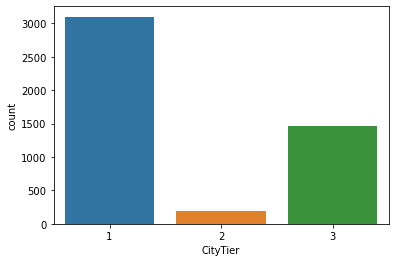

In [10]:
# look at CityTier

sns.countplot(df['CityTier'])

City tier 2 is a very small category. However, since it is the middle category it is unlikely that keeping it will result in major inbalances. 

<AxesSubplot:xlabel='Occupation', ylabel='count'>

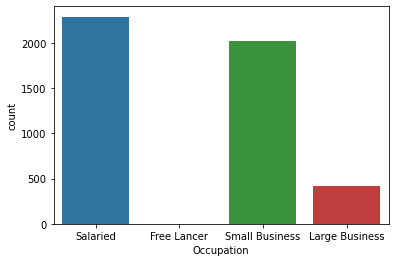

In [11]:
# look at Occupation

sns.countplot(df['Occupation'])

In [12]:
# there are exactly 2 freelancers. I will eliminate this category.

df = df[df["Occupation"]!='Free Lancer']
df.reset_index(inplace=True, drop=True)

df['Occupation'].value_counts()

Salaried          2293
Small Business    2028
Large Business     424
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

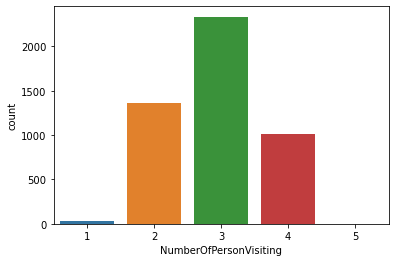

In [13]:
# look at NumberOfPersonVisiting

sns.countplot(df['NumberOfPersonVisiting'])

In [14]:
df['NumberOfPersonVisiting'].value_counts()

3    2335
2    1364
4    1008
1      35
5       3
Name: NumberOfPersonVisiting, dtype: int64

In [15]:
# there are too few catergories of 1 and 5 people visiting. I will eliminate these categories.

df = df[(df["NumberOfPersonVisiting"] != 1) & (df["NumberOfPersonVisiting"] != 5)]
df.reset_index(inplace=True, drop=True)

df['NumberOfPersonVisiting'].value_counts()

3    2335
2    1364
4    1008
Name: NumberOfPersonVisiting, dtype: int64

In [16]:
# deal with the Gender typos by replacing 'Fe Male' with 'Female'

df['Gender'].replace('Fe Male', 'Female', inplace = True)

df['Gender'].value_counts()

Male      2817
Female    1890
Name: Gender, dtype: int64

In [17]:
# finally, transform all object type variables into integers

for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = pd.Categorical(df[x])

df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
3,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
4,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


STEP 2 - OUTLIERS

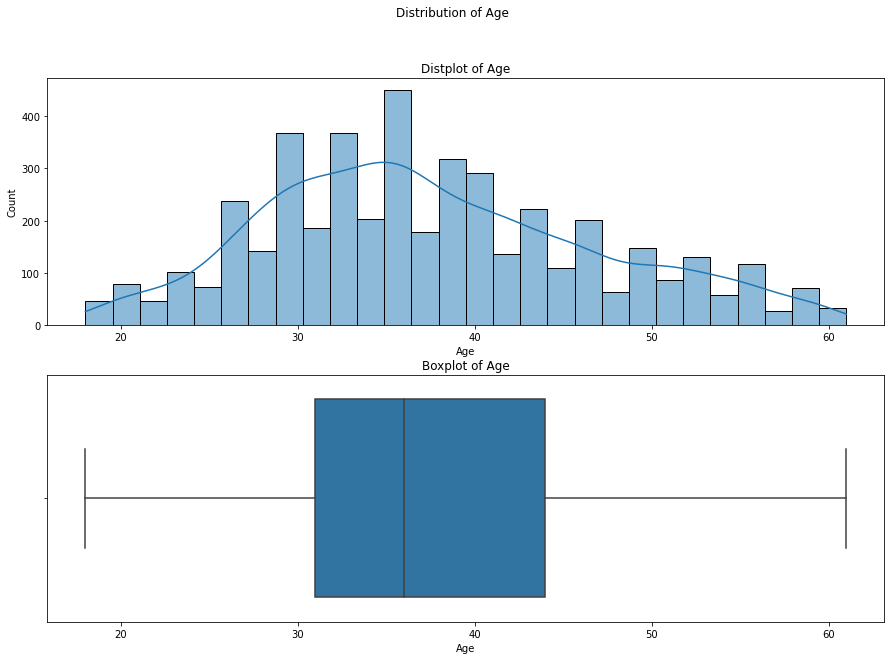

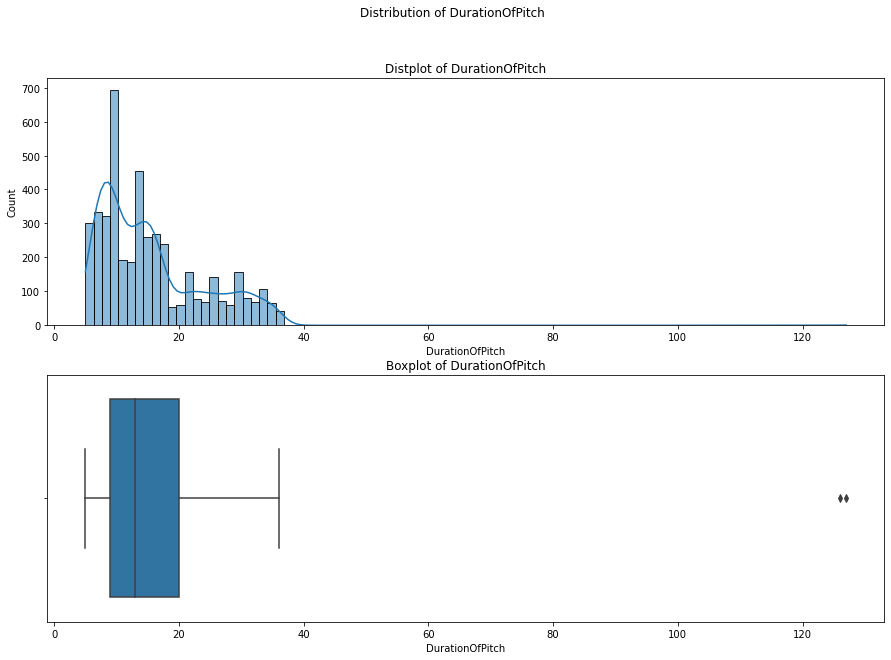

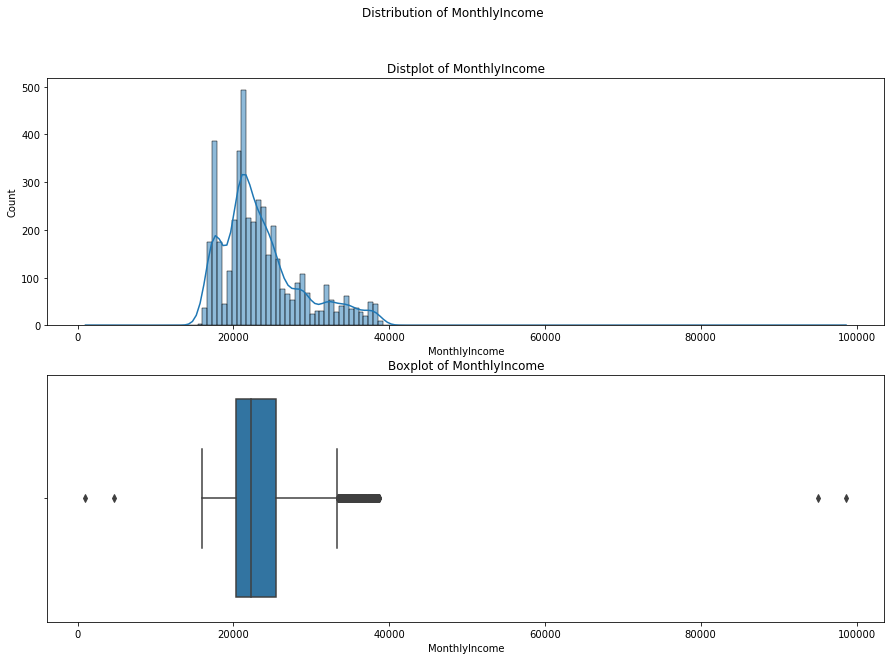

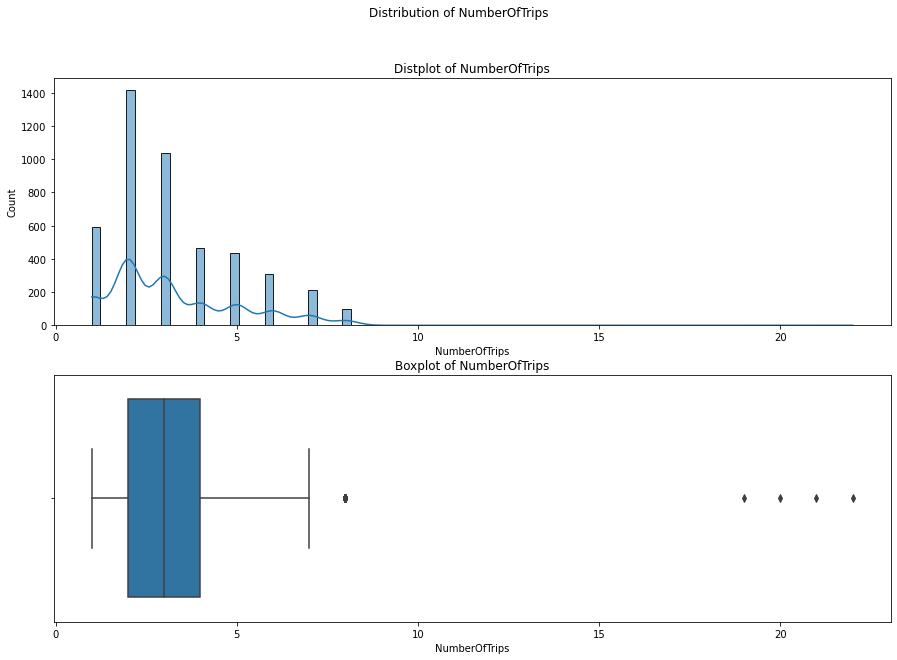

In [18]:
# plot the distribution of the continous variables as histogram and as a boxplot

cols = ['Age', 'DurationOfPitch', 'MonthlyIncome', 'NumberOfTrips']

for col in cols:
    fig = plt.figure(figsize = (15,10))
    fig.suptitle(f'Distribution of {col}')

    plt.subplot(211)
    plt.title(f'Distplot of {col}')
    sns.histplot(df[col], kde = True);

    plt.subplot(212)
    plt.title(f'Boxplot of {col}')
    sns.boxplot(data = df, x = col);



There seem to be potential outliers in the MonthlyIncome, NumberOfTrips and DurationOfPitch features.

In [19]:
# I will use the inter-quartile range method to eliminate outliers beyond the 4*IQR
# as all three features appear to be right skewed, I will use the median

cols = ['MonthlyIncome', 'NumberOfTrips', 'DurationOfPitch']

for col in cols:
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    iqr4 = 4 * (quartiles[1] - quartiles[0])
    print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {iqr4}')
    outliers = df.loc[np.abs(df[col] - df[col].median()) > iqr4, col] 
    count = outliers.count()
    print(f'Entries outside 4*IQR for {col}: {count}')

Q1 = 20343.75, Q3 = 25529.25, 4*IQR = 20742.0
Entries outside 4*IQR for MonthlyIncome: 3
Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0
Entries outside 4*IQR for NumberOfTrips: 4
Q1 = 9.0, Q3 = 20.0, 4*IQR = 44.0
Entries outside 4*IQR for DurationOfPitch: 2


In [20]:
# all three have outliers outside the specified range, they will be dropped

cols = ['MonthlyIncome', 'NumberOfTrips', 'DurationOfPitch']

for col in cols:
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    iqr4 = 4 * (quartiles[1] - quartiles[0])
    outliers = df.loc[np.abs(df[col] - df[col].median()) > iqr4].index
    df.drop(outliers, axis = 0, inplace = True)
    df.reset_index(inplace=True, drop=True)

STEP 3 - MISSING VALUES

In [21]:
# check for missing values

df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             242
MonthlyIncome               217
Age                         210
NumberOfTrips               138
NumberOfChildrenVisiting     60
NumberOfFollowups            43
TypeofContact                25
PreferredPropertyStar        25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
ProdTaken                     0
MaritalStatus                 0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

There are 8 features with missing values.

In [22]:
# to automatically deal with nans, I will create a function
# first, the function separates categorical features from continous ones by the percentage of unique values with a threshold of 0.5%
# second, for continous features it further separates them based on skewness and replaces nans with mode for skewed and with mean otherwise
# lastly, for categorical features it use the mode as replacement method

def nan_autofiller(dataframe):
    for feat in dataframe.columns:
       if dataframe[feat].isnull().sum() > 0:
           if (dataframe[feat].nunique()/dataframe[feat].count())*100 > 0.5:
            stat, p = shapiro(dataframe[dataframe[feat].notnull()==True][feat])
            alpha = 0.05
            if p > alpha:
                dataframe[feat].fillna(np.mean(dataframe[dataframe[feat].notnull()==True][feat]), inplace = True)
            else:
                dataframe[feat].fillna(np.median(dataframe[dataframe[feat].notnull()==True][feat]), inplace = True)
           else:
               dataframe[feat].fillna(mode(dataframe[dataframe[feat].notnull()==True][feat]), inplace = True)
                


In [23]:
# run the function and verify nans
nan_autofiller(df)
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

STEP 4 - FEATURE ENGINEERING ----IDEAS????----

STEP 5 - EDA

UNIVARIATE ANALYSIS

In [24]:
# I will create a function to display the histogram and boxplot of continous variables 

def box_hist(data, col):
    f2, (ax_box2, ax_hist2) = plt.subplots(ncols = 2, sharex = True, figsize = [18,6]);
    sns.boxplot(data = data, x = col, ax = ax_box2, showmeans = True, color = 'green');
    sns.histplot(data = data, x = col, kde = True, ax = ax_hist2);
    ax_hist2.axvline(df[col].mean(), color = 'red', linestyle = "--");
    ax_hist2.axvline(df[col].median(), color = 'yellow', linestyle = "-");

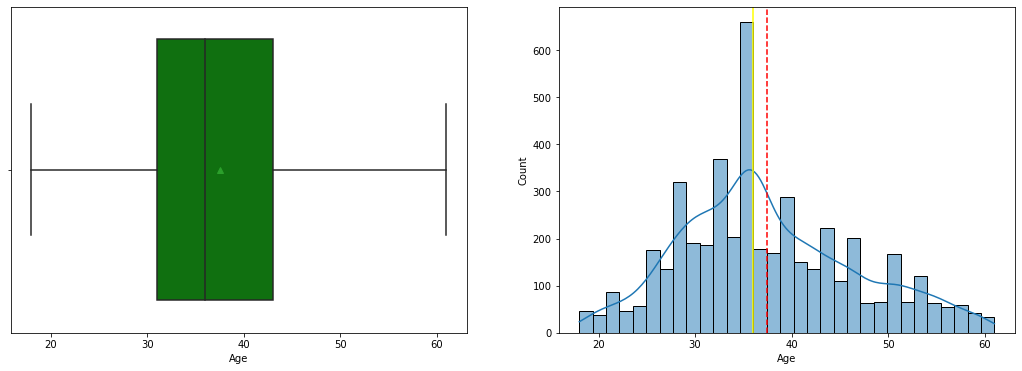

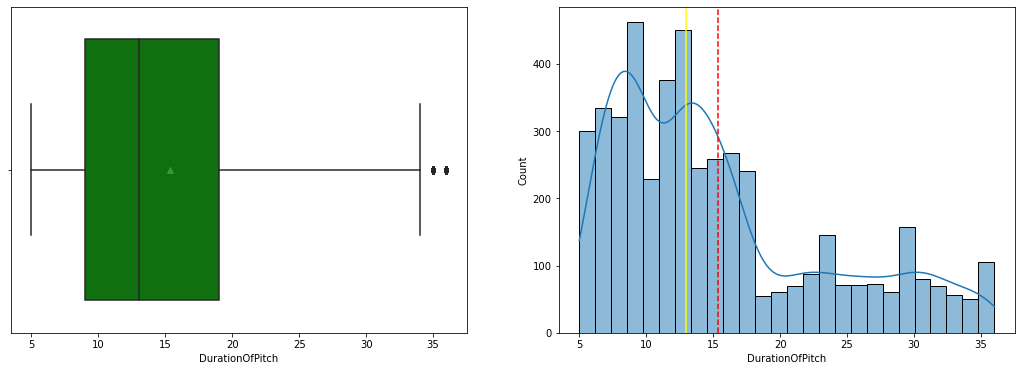

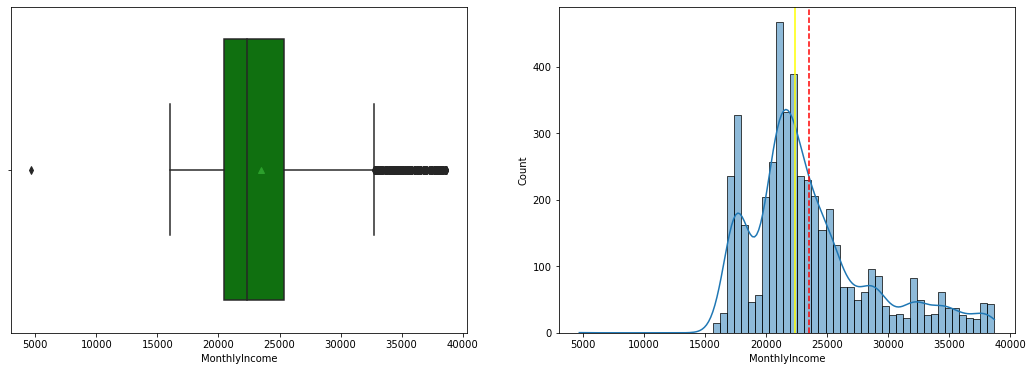

In [25]:
# run the function for all continous variables

for feat in df.columns:
    if (df[feat].nunique()/df[feat].count())*100 > 0.5:
        box_hist(df, feat)


Observations:
1. AGE has a mostly normal distribution. With no obvious outliers. The mean age is around 37 and the median 36.
2. Duration of Pitch is right skewed. There seem to be outliers, however, as they are not outside the 4*IQ range, they will not be removed. The average pitch is about 15 minutes, whilst the median is around 13.
3. Monthly Income is also right skewed. There are outliers, but they are within the 4*IQ range and will not be removed. The average salary is 23.5k with the median slightly below that.


In [26]:
df[df['MonthlyIncome'] < 5000].iloc[0,:]

ProdTaken                                0
Age                                   39.0
TypeofContact                 Self Enquiry
CityTier                                 1
DurationOfPitch                       10.0
Occupation                  Large Business
Gender                              Female
NumberOfPersonVisiting                   3
NumberOfFollowups                      4.0
ProductPitched                      Deluxe
PreferredPropertyStar                  3.0
MaritalStatus                       Single
NumberOfTrips                          5.0
Passport                                 1
PitchSatisfactionScore                   5
OwnCar                                   0
NumberOfChildrenVisiting               1.0
Designation                        Manager
MonthlyIncome                       4678.0
Name: 2473, dtype: object

In [27]:
# the one Monthly Income outlier (the minimum), although within the agreed 4*IQ range, stands far from all the rest and will be dropped

df.drop(df[df['MonthlyIncome'] < 5000].index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)

Now I will have a loot at the categorical features.

In [28]:
# To be able to create a function which can automatically create sublplots, i must first create
# a function which generates the necessary coordinates

def coordinate_generator(features):
    
    # my preferred subplot structure is 3X3, therefore I will cap the nr of feaures at 9
    sets = [features[i:i+9] for i in range(0, len(features), 9)]

    # create the final list of lists of coordinates
    coordinates_list = []

    # loop through the different sets of features
    for set in range(len(sets)):
        # x,y,z are the subplot 'coordinates'
        z = 1 # z will range from 1 to 'size' (which represents the total number of columns)
        size = len(sets[set])
        # address the 2 possible outcomes: even or odd number
        if size % 2 == 0:
            x = int(size/2)
            y = int(size/2)
            if y > 3: # cap nr of rows(y) at 3
                y = 3
                x = size - y
        else:
            x = round(size/2)
            y = size - x
            if y > 3:
                y = 3
                x = size - y
        # create a list of coordinates
        counter = 1
        coordinates = []
        while counter <= size:
            coord = int(str(x)+str(y)+str(z)) # coordinate must be integer
            coordinates.append(coord)
            z += 1
            counter += 1
        coordinates_list.append(coordinates)
    return coordinates_list
        

In [29]:
# I will now create a function which automatically generates count plots for the categorical variables

def auto_countplot(dataframe):
    # fill a list with the categorical features based on the percentage unique threshold
    cat_feats = []
    for feat in dataframe.columns:
        if (dataframe[feat].nunique()/dataframe[feat].count())*100 <= 0.5:
            cat_feats.append(feat)

    coordinates = coordinate_generator(cat_feats) 

    # check if we have multiple sets
    if len(coordinates) == 1:
        # plot the overall figure
        fig = plt.figure(figsize = (18,30))
        fig.suptitle('Count plots for all categorical variables', size = 20)
        # plot individual countplots
        for feat in range(len(cat_feats)):      
                plt.subplot(coordinates[feat])
                plt.title(f'{cat_feats[feat]}')
                sns.countplot(data = dataframe, x = cat_feats[feat]);
    else:
        # separates the list of features into multiple sets of max 9 items each
        sets = [cat_feats[i:i+9] for i in range(0, len(cat_feats), 9)]
        for set in range(len(sets)):
            # plot the overall figure
            fig = plt.figure(figsize = (20,35))
            fig.suptitle('Count plots for all categorical variables', size = 20)
            # plot individual countplots
            for feat in range(len(sets[set])):      
                plt.subplot(coordinates[set][feat])
                plt.title(f'{sets[set][feat]}', size = 15)
                plt.xlabel(f'{sets[set][feat]}', size = 10)
                sns.countplot(data = dataframe, x = sets[set][feat]);



       

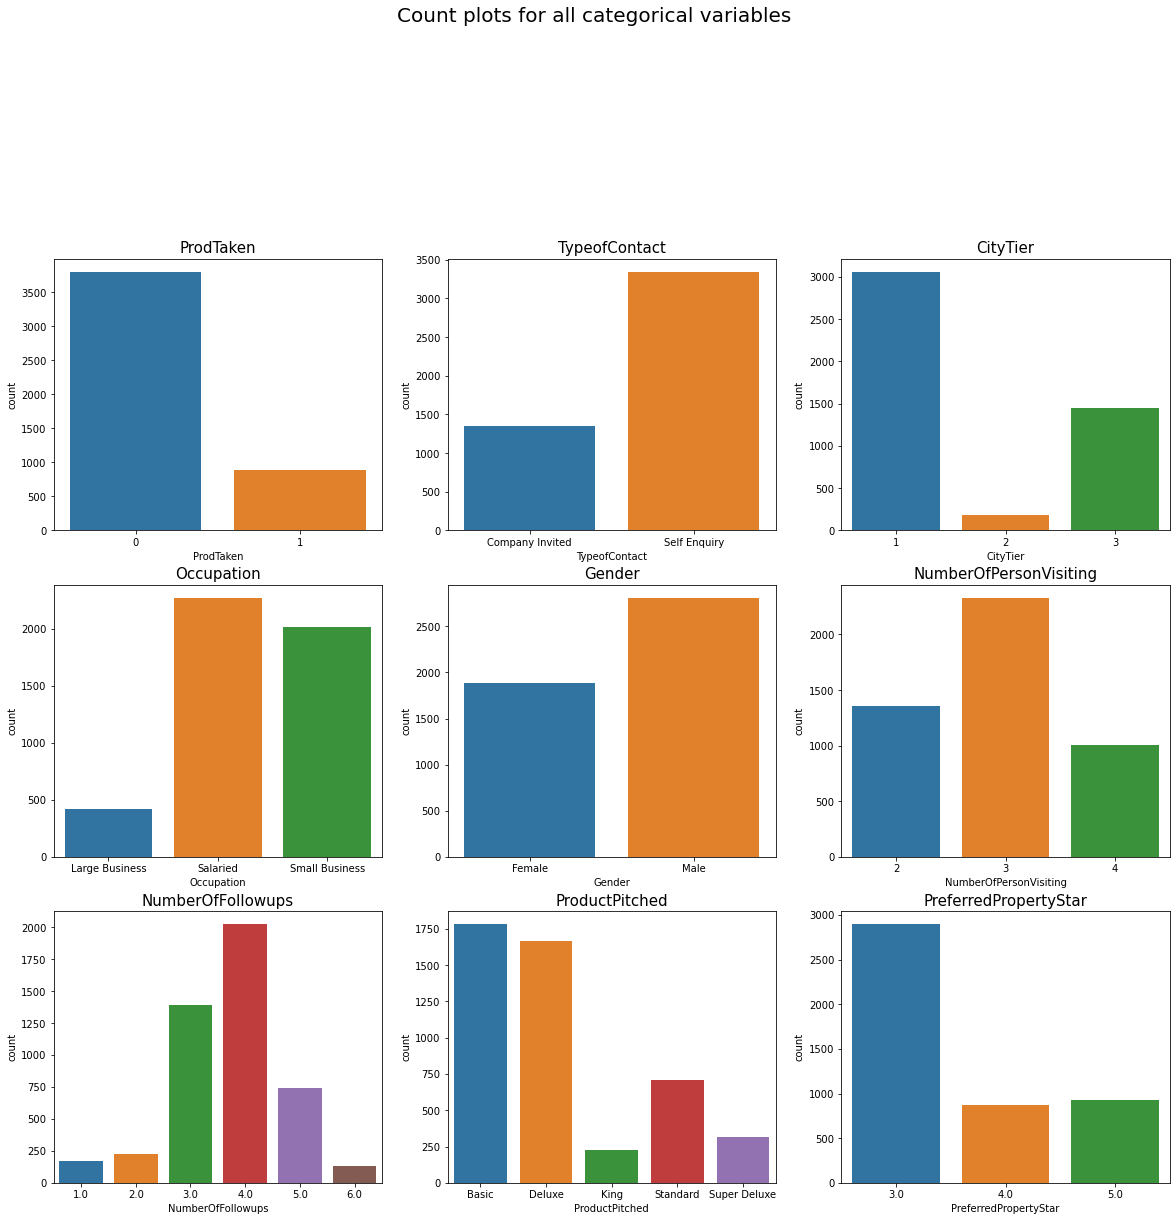

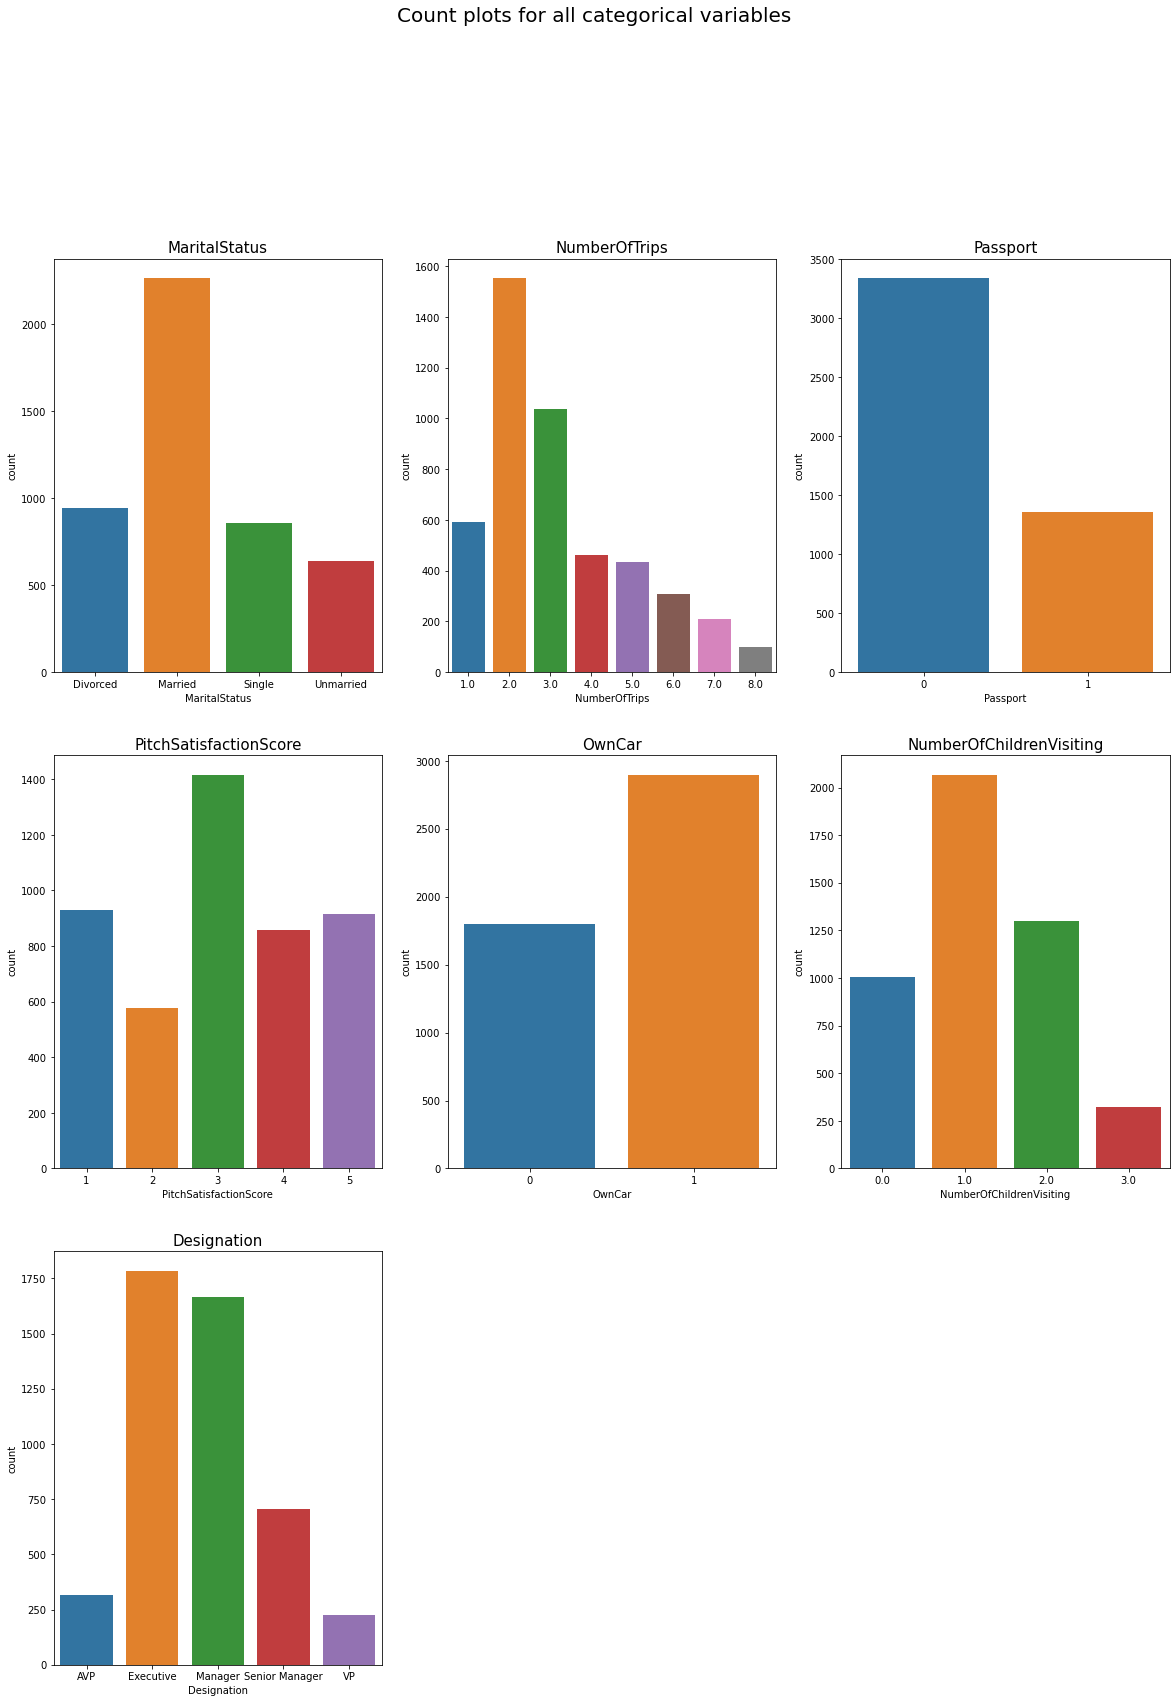

In [30]:
# run the function

auto_countplot(df)

Observations:

About the client:
1. OCCUPATION: most are either salaried or own small businesses, very few own large businesses.
2. DESIGNATION: most are either executives or managers.
3. GENDER: there are about 20% more males.
4. CITY TIER: most live in tier 1 (the best), about a third as many live in tier 3, surprisingly, very few live in tier 2. 
5. MARITAL STATUS: by far the most are married, the rest fall in equally sized categories of divorced, single nd unmarried. 
6. OWN CAR: most own a car.
7. PASSPORT: twice as many do not have a passport.

About the holidays:
1. NR. OF TRIPS: by far the most common is 2, followed by 3 and 1.
2. NR. OF PERSONS VISITING: most common is 3, with 2 and 4 of similar levels
3. NR. OF CHILDREN: by far most common is 1, 0 and 2 on similar levels, and very few with 3 children.
4. PREFERRED PROPERTY STAR: by far most preferred is a rating of 3, with 4 and 5 on similar, and much lower, levels.

About the pitch:
1. PRODUCT PITCHED: basic and deluxe are most popular, the rest are much lower.
2. PITCH SATISFACION SCORE: most chose a rating of 3 from a total of 5, with other scores similar, and noticeably lower.
3. NR. OF FOLLOW-UPS: most common is 4, followed by 3 and 5, with the other values very low.
4. TYPE OF CONTACT: 3 times more likely to be a self enquiry.

Target variable:
1. PRODUCT TAKEN: by far most clients did not take the product.





BIVARIATE ANALYSIS

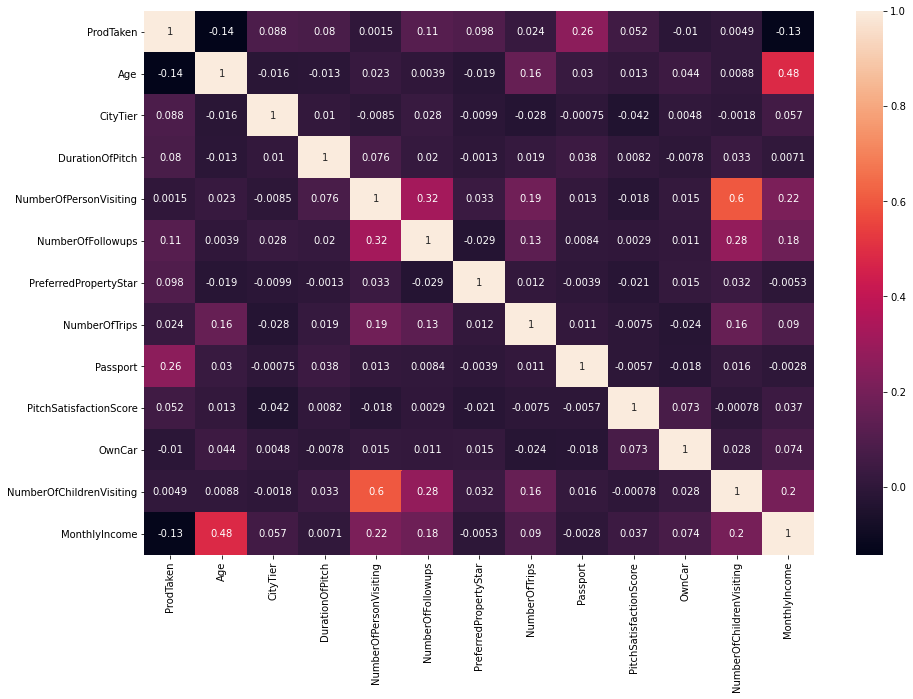

In [31]:
# start with a correlation matrix

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True);

There are no strong correlation, only 2 moderate one:
1. Monthly Income and age, which is a common, often occuring, correlation.
2. Number of children visiting and total number of persons visiting, which is unsurprising.

Interesting lack of correlation between MONTHLY INCOME and PREFERRED PROPERTY STAR. 

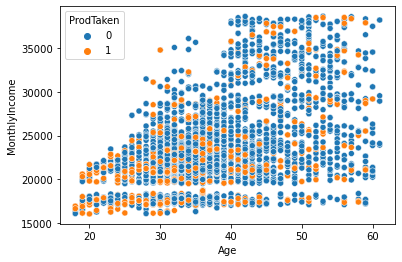

In [32]:
# investigate relationship between ProdTaken, and salary and age

sns.scatterplot(data=df, x = 'Age', y = 'MonthlyIncome', hue = 'ProdTaken' );

There is a conconcentration of clients who accepted the product in the bottom left corner, meaning: younger, less wealthy clients are more likely to accept the product.

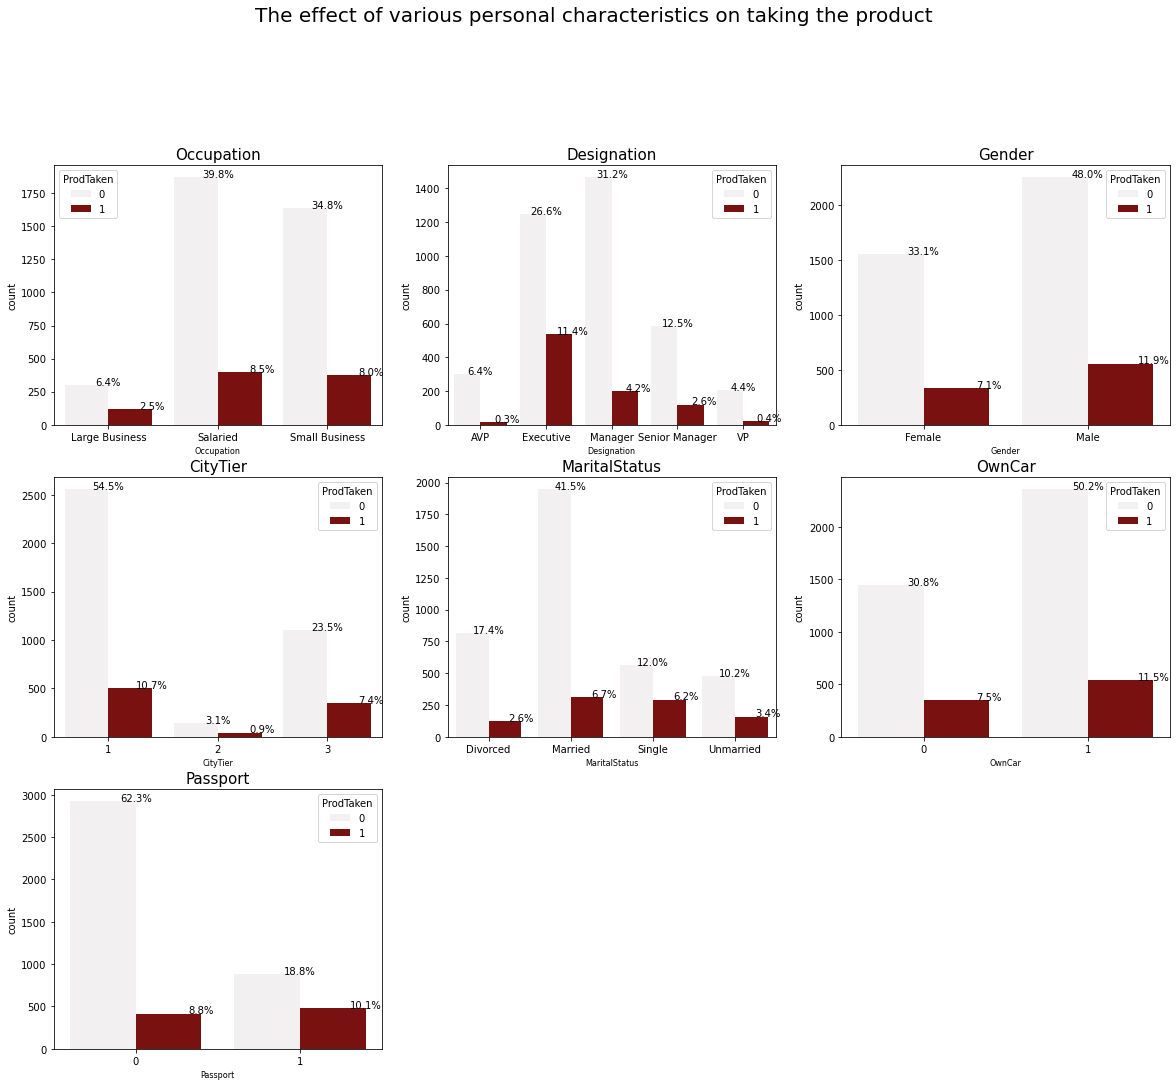

In [33]:
# investigate the personal characteristics of the clients in terms of accepting the product

targets = ['Occupation', 'Designation', 'Gender', 'CityTier', 'MaritalStatus', 'OwnCar', 'Passport']

# create base figure
fig = plt.figure(figsize = (20, 22))
fig.suptitle('The effect of various personal characteristics on taking the product', size = 20)

# calculate length of dataframe (neede for percentages)
total = float(len(df)) 

# generate coordinates
coordinates = coordinate_generator(targets)

# create each count plot
for target in range(len(targets)):
    plt.subplot(coordinates[0][target])
    plt.title(f'{targets[target]}', size = 15)
    plt.xlabel(f'{targets[target]}', size = 8)
    ax = sns.countplot(x=targets[target], hue="ProdTaken", data=df, color= 'darkred')
    # create percentages
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() + p.get_width()
        y_coord = p.get_height()
        ax.annotate(percentage, (x_coord, y_coord),ha='center')

Personal characeristics of clients who accepted:

1. Salaried and small business owners more likely to take the product.
2. Executives are significantly more likely, followed by managers.
3. Men are slightly more likely, but the sample contains more males overall. Difference is negligible.
4. City tier 1 and 3 more likely. Proportionally, more tier 3 residents accepted.
5. Single people are proportionally more likely to accept.
6. Clients without a car a more likely to accept.
7. Clients with passport more likely.

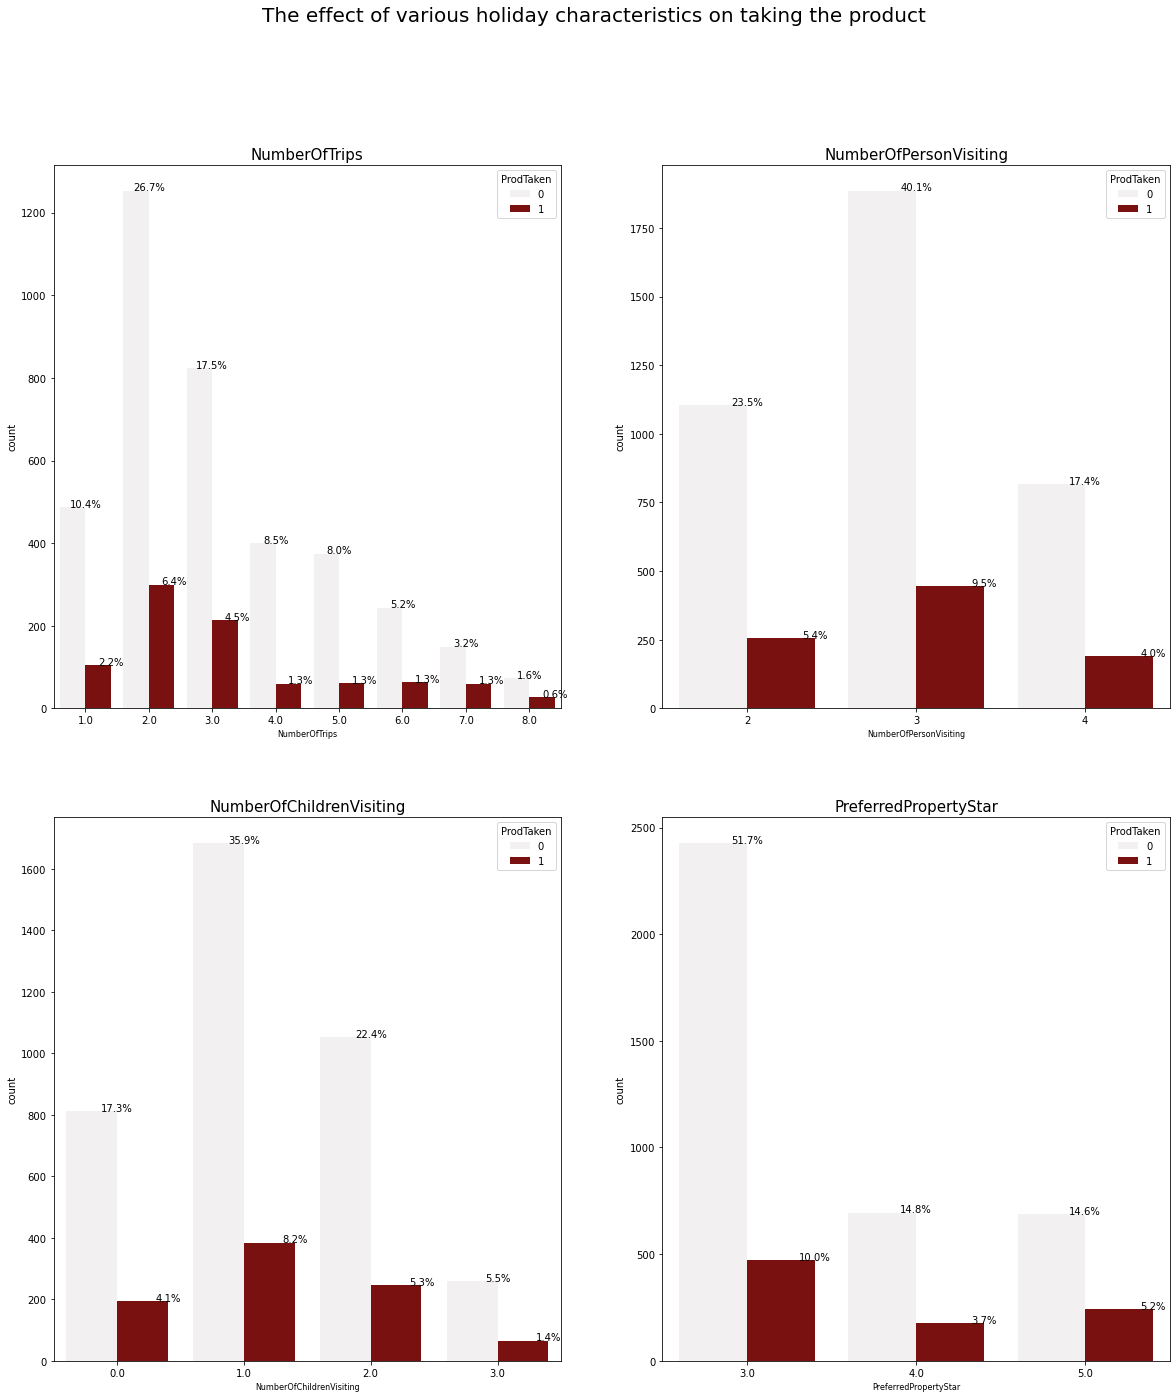

In [34]:
# investigate the characteristics of the holidays of clients who accepted the product

targets = ['NumberOfTrips', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'PreferredPropertyStar']

# create base figure
fig = plt.figure(figsize = (20, 22))
fig.suptitle('The effect of various holiday characteristics on taking the product', size = 20)

# calculate length of dataframe (neede for percentages)
total = float(len(df)) 

# generate coordinates
coordinates = coordinate_generator(targets)

# create each count plot
for target in range(len(targets)):
    plt.subplot(coordinates[0][target])
    plt.title(f'{targets[target]}', size = 15)
    plt.xlabel(f'{targets[target]}', size = 8)
    ax = sns.countplot(x=targets[target], hue="ProdTaken", data=df, color= 'darkred')
    # create percentages
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() + p.get_width()
        y_coord = p.get_height()
        ax.annotate(percentage, (x_coord, y_coord),ha='center')

Characteristics of the holidays of clients who accepted:
1. Two and three trips are most common with clients who accepted.
2. Product is most suitable for groups of three people, most likely a family with one child.
3. Most clients who accepted when on holiday with one child. Clients without children were proportionally most likely to have accepted.
4. Three stars was the rating preferred by most clients who accepted. However, proportionally, clients who wanted a five star property were more likely to have accepted the product.

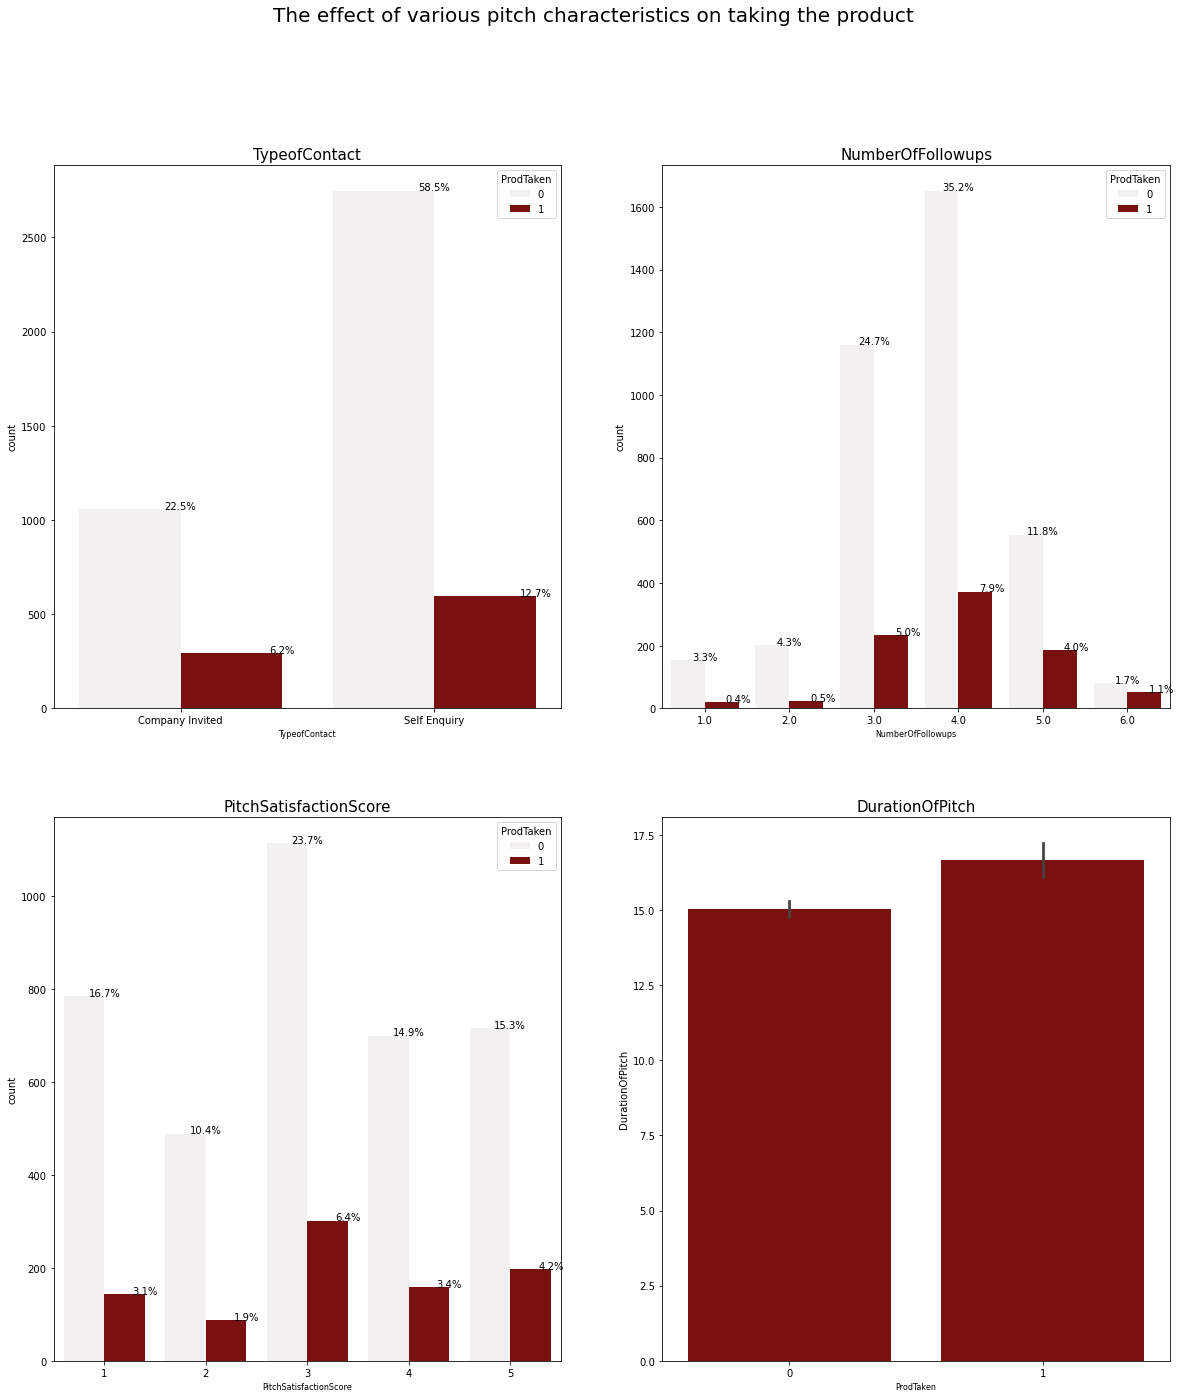

In [35]:
# investigate the characteristics of the pitch for the clients who accepted the product

targets = ['TypeofContact', 'NumberOfFollowups', 'PitchSatisfactionScore', 'DurationOfPitch']

# create base figure
fig = plt.figure(figsize = (20, 22))
fig.suptitle('The effect of various pitch characteristics on taking the product', size = 20)

# calculate length of dataframe (neede for percentages)
total = float(len(df)) 

# generate coordinates
coordinates = coordinate_generator(targets)

# create each count plot
for target in range(len(targets)-1):
    plt.subplot(coordinates[0][target])
    plt.title(f'{targets[target]}', size = 15)
    plt.xlabel(f'{targets[target]}', size = 8)
    ax = sns.countplot(x=targets[target], hue="ProdTaken", data=df, color= 'darkred')
    # create percentages
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x() + p.get_width()
        y_coord = p.get_height()
        ax.annotate(percentage, (x_coord, y_coord),ha='center')
plt.subplot(coordinates[0][-1])
plt.title(f'{targets[-1]}', size = 15)
plt.xlabel(f'{targets[-1]}', size = 8)
sns.barplot(data = df, y = targets[-1], x = 'ProdTaken', color= 'darkred');

Characteristics of the pitch for clients who accepted:
1. Proportinally there was not difference, but overall, more people with a self enquiring accepted the product.
2. Most clients who accepted were visited 4, 3 or 5 times. Proportionally, 5 follow-ups were most succesful.
3. Satisfaction score did not seem to make a difference: proportionally, all scores led to similar ratios of accepting/rejecting.
4. Duration of pitch made a slight improvement on the odds of a client accepting.

EDA INSIGHTS:

1. The mean age of the clients is around 37.
2. The profile of the client who tends to accept the product: Younger, less wealthy, salaried or owner of small business, with the title of either executives or managers (less so), lives in city tier 3, is either single or with only 1 child, owns a car and a passport.
3. The profile of the holiday package purchased through the product: contains 2 or 3 trips and involves a 5 star rated property. 
4. The profile of the successful pitch: is longer (minor advantage), has 3,4, or 5 follow-ups, through self enquiry (minor advantage. Pitch satisfaction did not appear to make a difference.





In [36]:
# With the EDA done I will eliminate certain features which are related to the advertising campaing as info from these
# would not be relevant to choosing new clients, since they would not have had sales pitch at this point

df.drop(['NumberOfFollowups', 'PitchSatisfactionScore', 'DurationOfPitch', 'ProductPitched'], axis = 1, inplace = True)

STEP 6 - NORMALISATION of the distribution

In [38]:
#  I will first separate the target feature from the rest

y = df['ProdTaken']
X = df.drop('ProdTaken', axis = 1)

In [39]:
# Duration of Pitch and Monthly Income were found to have a skewed distribution
# I will use the logarithmic transformation to normalise the features, as neither contains negatives or zeros

cols = ['MonthlyIncome']
for col in cols:
    X[col + '_log'] = np.log(X[col])
X.drop(cols, axis=1, inplace=True)

STEP 7 - RESCALING

In [40]:
# I will use Z tranformation to rescale all numerical features

std_scaler = StandardScaler()

cols = ['Age', 'MonthlyIncome_log']
for col in cols:
    X[col + '_Ztrans'] = std_scaler.fit_transform(X[[col]])
X.drop(cols, axis=1, inplace=True)


STEP 8 - ENCODING CATEGORICAL FEATURES

In [41]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,Salaried,Female,3,3.0,Single,1.0,1,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,Salaried,Male,3,4.0,Divorced,2.0,0,1,2.0,Manager,20130.0
2,0,33.0,Company Invited,1,Salaried,Female,2,3.0,Divorced,2.0,1,1,1.0,Executive,17909.0
3,0,36.0,Self Enquiry,1,Small Business,Male,2,4.0,Divorced,1.0,0,1,0.0,Executive,18468.0
4,0,32.0,Company Invited,1,Salaried,Male,3,3.0,Single,1.0,0,1,1.0,Executive,18068.0


ORDINAL categorical features: CityTier, Occupation, NumberOfPersonVisiting, NumberOfFollowups, ProductPitched, PreferredPropertyStar, NumberOfTrips, PitchSatisfactionScore, NumberOfChildrenVisiting, NumberOfPersonVisiting, NumberOfFollowups, Designation.

NOMINAL categorical features: TypeofContact, Passport, OwnCar, Gender, ProductPitched, MaritalStatus. 

I will only encode the nominal features, besides Passport and OwnCar since both contain only 0s and 1s.

In [42]:
# for the ordinal features, I will replace the categories with numbers

to_replace = {'Occupation': {'Salaried': 1, 'Small Business': 2, 'Large Business': 3},
                'Designation': {'Executive': 1, 'Manager': 2, 'Senior Manager': 3, 'AVP': 4, 'VP': 5}}

X = X.replace(to_replace)


In [43]:
# I will use one-hot encoding for the categorical variables with more than 2 categories
# Although ProductPitched should be ordinal, the dataset did not specifiy the order and, to avoid guessing, I will 
# encode as nominal

enc = OneHotEncoder()
df_enc = enc.fit_transform(X[['Gender', 'MaritalStatus', 'TypeofContact']]).toarray()

# create feature names and then create a dataframe
enc_cols = enc.get_feature_names(['Gender', 'MaritalStatus', 'TypeofContact'])
enc_frame =  pd.DataFrame(df_enc, columns = enc_cols)
X = X.join(enc_frame)

# drop the unencoded cols
X.drop(['Gender','MaritalStatus', 'TypeofContact'], axis = 1, inplace = True)

In [44]:
X.head()

,CityTier,Occupation,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,Age_Ztrans,MonthlyIncome_log_Ztrans,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,TypeofContact_Company Invited,TypeofContact_Self Enquiry
0,3,1,3,3.0,1.0,1,1,0.0,2,0.384103,-0.465319,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,3,4.0,2.0,0,1,2.0,2,1.260426,-0.675311,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,1,2,3.0,2.0,1,1,1.0,1,-0.492220,-1.260139,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,2,2,4.0,1.0,0,1,0.0,1,-0.163599,-1.106382,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,3,3.0,1.0,0,1,1.0,1,-0.601761,-1.215922,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


STEP 9 - TRAIN TEST SPLIT

In [45]:
# first observe how many of the two categories of the target value are there

accepted = (y[y == 1].count()/len(y))*100
declined = (y[y == 0].count()/len(y))*100
print(f'Proportion of clients who accepted is {accepted}, whilst of those who declined is {declined}')

Proportion of clients who accepted is 18.948264849904195, whilst of those who declined is 81.05173515009581


Notice the significant imbalance between the groups, this will have to be taken into consideration throughout the model fitting process.

In [47]:
# I will train/test split 70% - 30%, but due to several categorical features (including the target variable) having noticeable
# imbalances, will use stratify

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state = 1)

In [48]:
# check proportions of target variable categories

accepted = (y_train[y_train == 1].count()/len(y_train))*100
declined = (y_train[y_train == 0].count()/len(y_train))*100
print(f'Proportion of clients in the TRAIN set who accepted is {accepted}, whilst of those who declined is {declined}')

accepted = (y_test[y_test == 1].count()/len(y_test))*100
declined = (y_test[y_test == 0].count()/len(y_test))*100
print(f'Proportion of clients in the TEST set who accepted is {accepted}, whilst of those who declined is {declined}')


Proportion of clients in the TRAIN set who accepted is 18.953452996653482, whilst of those who declined is 81.04654700334652
Proportion of clients in the TEST set who accepted is 18.93617021276596, whilst of those who declined is 81.06382978723404


In [49]:
# first, I need a function which would automatically calculate several accuracy metrics

def dec_tree_performance(model, train_predictors, train_targets, test_predictors, test_targets):

    # calculate the y_preds
    train_y_pred = model.predict(train_predictors)
    test_y_pred = model.predict(test_predictors)
    
    # calculate accuracy metrics
    train = [accuracy_score(train_targets, train_y_pred), recall_score(train_targets, train_y_pred), precision_score(train_targets, train_y_pred), 
                f1_score(train_targets, train_y_pred), cohen_kappa_score(train_targets, train_y_pred)]

    test = [accuracy_score(test_targets, test_y_pred), recall_score(test_targets, test_y_pred), precision_score(test_targets, test_y_pred), 
                f1_score(test_targets, test_y_pred), cohen_kappa_score(test_targets, test_y_pred)]

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"TRAIN set": train, "TEST set": test}, index=['Accuracy', 'Recall', 'Precision', 'F1', "Cohen's kappa"])

    return df_perf
 

In [50]:
# next, I will create a function to plot the confusion matrix

def dec_tree_confmat(model, train_predictors, train_targets, test_predictors, test_targets):

    # calculate the y_preds
    train_y_pred = model.predict(train_predictors)
    test_y_pred = model.predict(test_predictors)

    # create the overall figure
    plt.figure(figsize = (18, 6))
    plt.suptitle('Confusion matrices', size = 18)

    # create the individual confusion matrices
    cm_train = confusion_matrix(train_targets, train_y_pred)
    plt.subplot(121)
    sns.heatmap(cm_train, annot = True, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title('TRAIN SET')

    cm_test = confusion_matrix(test_targets, test_y_pred)
    plt.subplot(122)
    sns.heatmap(cm_test, annot = True, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title('TEST SET')

Before fitting the models, metric importance needs to be addressed:

The goal is to predict which customer is more likely to purchase the travel package. The company is earning money for every succesful purchase, but the advertising costs are also high. Especially since EDA has shown that 3 and above number of follow-ups would start making a difference, alongside longer pitches, both meaning more money sunk into adverising. Furthermore, since the EDA has also shown that pitch satisfaction does not appear to affect success rate, it would be hard to figure out how to optimise advertising. 

Therefore, it is also important to minimise false positives and so, PRECISION and RECALL are both important. As such, a composite score, such as F1 or COHEN'S KAPPA would be better suited here.

STEP 10 - DECISION TREE

In [51]:
X_train.head()

,CityTier,Occupation,NumberOfPersonVisiting,PreferredPropertyStar,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,Age_Ztrans,MonthlyIncome_log_Ztrans,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,TypeofContact_Company Invited,TypeofContact_Self Enquiry
1409,1,2,2,3.0,7.0,1,0,1.0,1,0.712724,-1.394036,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2190,1,1,3,4.0,1.0,0,0,0.0,1,-0.930382,-1.154558,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1183,1,2,3,3.0,2.0,0,1,2.0,1,-1.259003,-1.355738,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
645,1,1,3,3.0,2.0,0,1,1.0,1,-1.806705,-1.320840,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4216,3,2,4,4.0,3.0,1,1,1.0,1,-2.025786,-0.570551,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [52]:
# fit a simple decision tree first
# use class_weight due to imbalances in target category ratios

dt_basic = DecisionTreeClassifier(class_weight = {1:0.81, 0:0.19}, random_state=1)
dt_basic.fit(X_train, y_train)

dec_tree_performance(dt_basic, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,1.0,0.861702
Recall,1.0,0.629213
Precision,1.0,0.636364
F1,1.0,0.632768
Cohen's kappa,1.0,0.547582


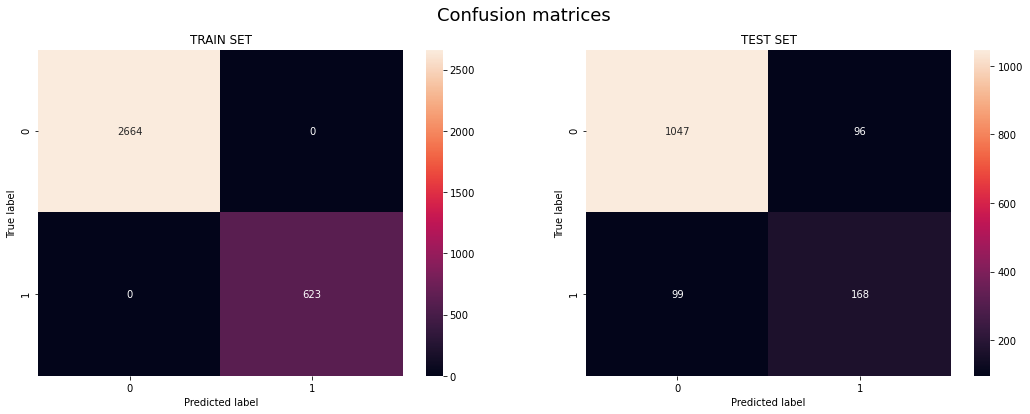

In [53]:
# create confusion matrices

dec_tree_confmat(dt_basic, X_train, y_train, X_test, y_test)

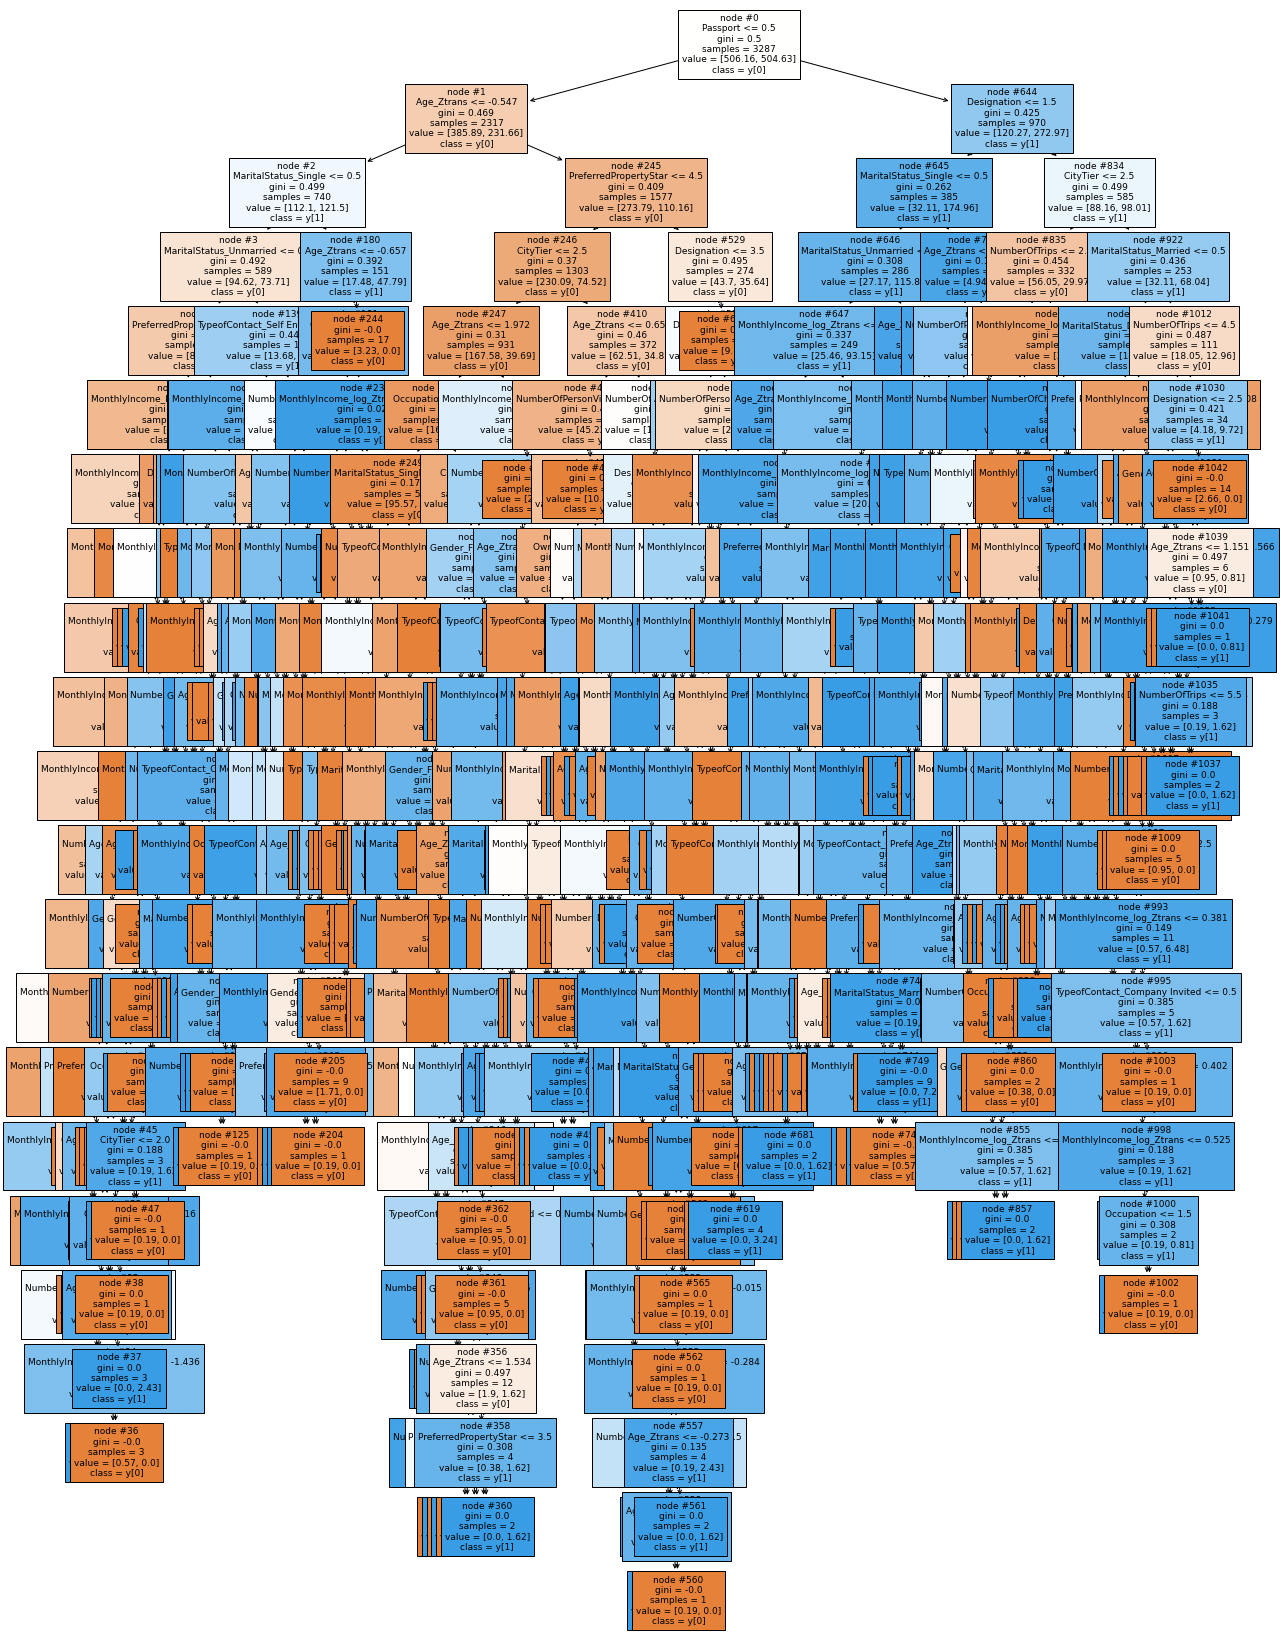

In [54]:
# visualise the complexity of this model

plt.figure(figsize=(20,30))
tree.plot_tree(dt_basic, feature_names= list(X.columns), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

Observations:
As expected, the basic decision tree model is:
1. Performing perfectly on the train set, but less so on the test set.
2. Displaying significant overfitting.
3. Very complex.

In [55]:
# will try to improve perfromance using the PRE-PRUNING technique of GridSearch

# create classifier
model = DecisionTreeClassifier(class_weight = {1:0.81, 0:0.19}, random_state=1)

# set parameters
parameters = {'criterion' : ['gini', 'entropy'],
            'max_depth': np.arange(1,12),
            'min_samples_leaf': np.arange(1, 10),
            'max_leaf_nodes' : [2, 3, 5, 10, 15], 
            'min_impurity_decrease': [0.0001, 0.001,0.01,0.1]
             }

# set type of score to judge accuracy on, in this case - F1 score
acc = make_scorer(f1_score)

# run the grid search, with 5 cross validation sets
grid_obj = GridSearchCV(model, parameters, scoring=acc, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# use best parameters to create a new model
dt_pre = grid_obj.best_estimator_

# Fit the best algorithm to the data 
dt_pre.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=5,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=3, random_state=1)

In [56]:
# get performance metrics
dec_tree_performance(dt_pre, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.761789,0.741844
Recall,0.693419,0.644195
Precision,0.421875,0.390023
F1,0.524590,0.485876
Cohen's kappa,0.377995,0.327151


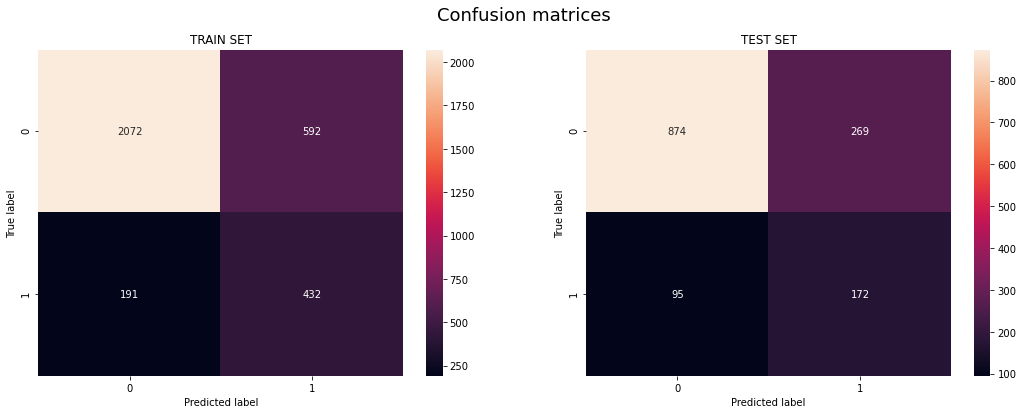

In [57]:
# create confusion matrices

dec_tree_confmat(dt_pre, X_train, y_train, X_test, y_test)

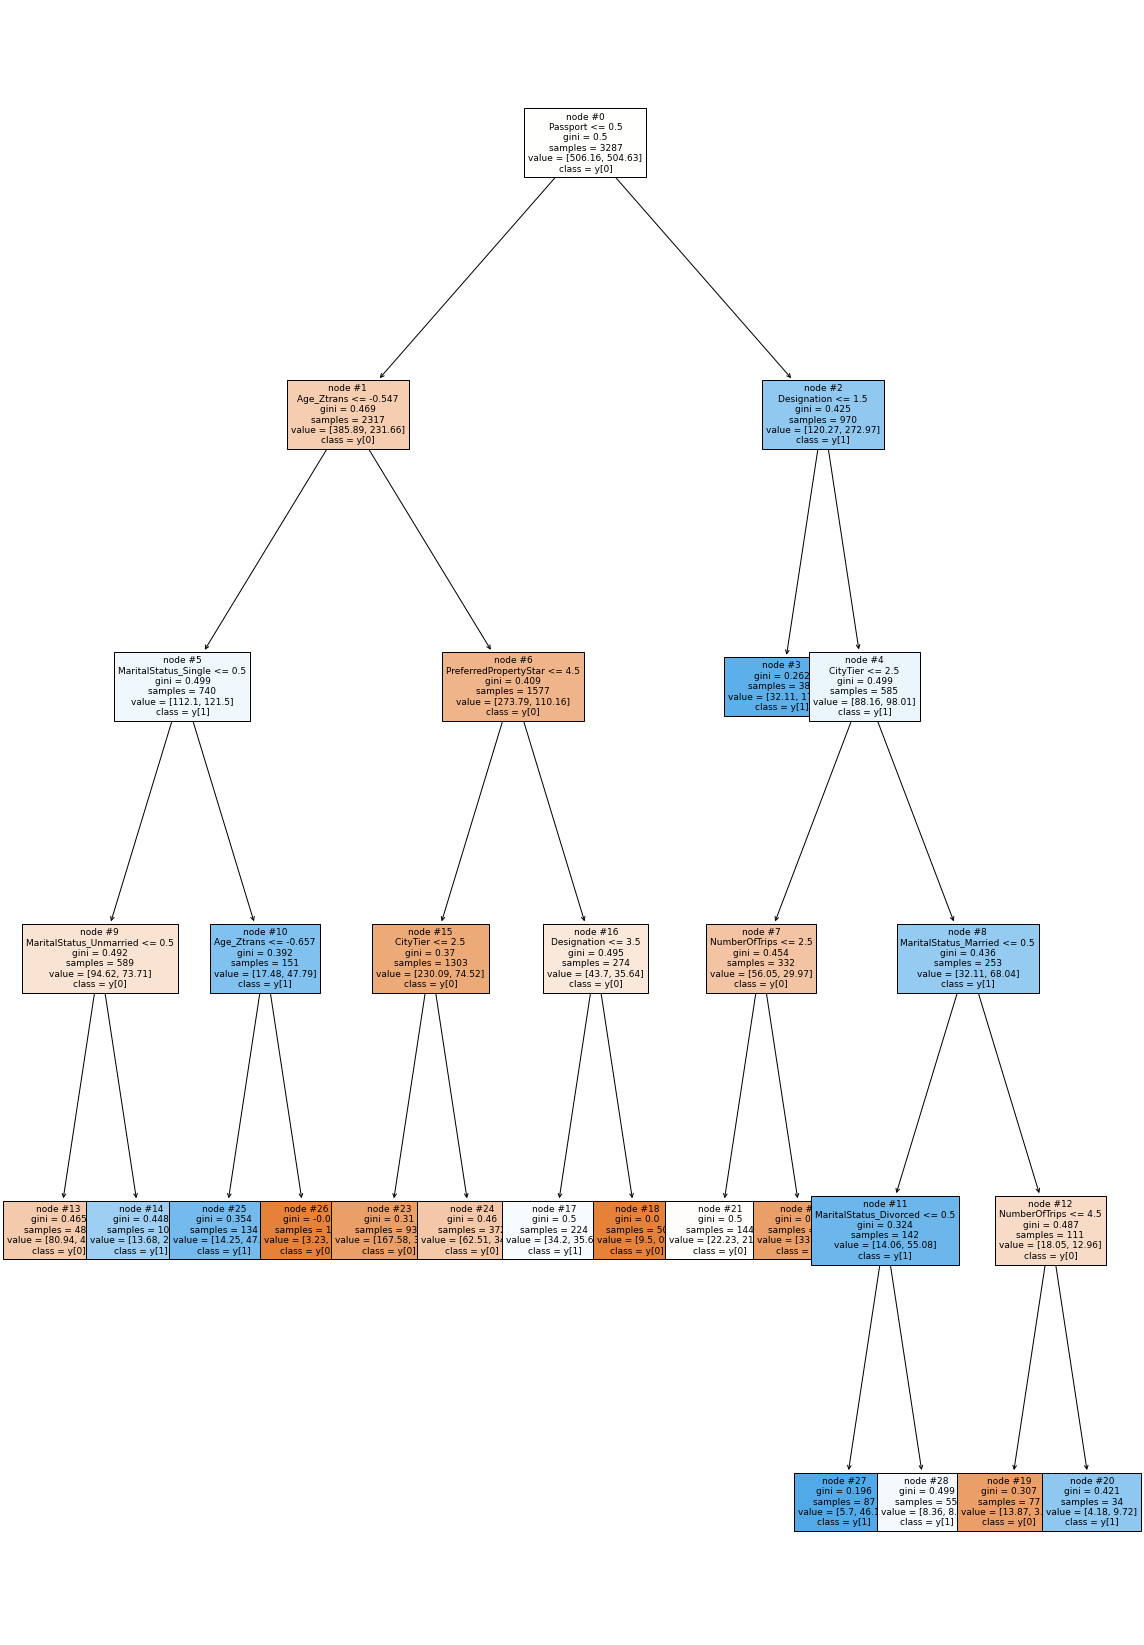

In [58]:
# visualise the complexity of this model

plt.figure(figsize=(20,30))
tree.plot_tree(dt_pre, feature_names= list(X.columns), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

This is a much simpler model, which shows a negligible overfit. However, the performance is significantly worse. 

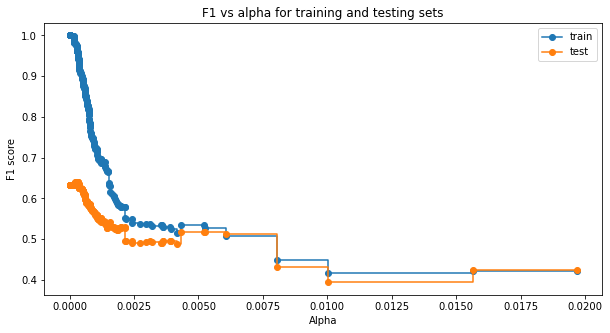

In [59]:
# now I will try to improve performance using a POST-PRUNING technique, the COST-COMPLEXITY pruning

# first create a model
model_post = DecisionTreeClassifier(class_weight = {1:0.81, 0:0.19}, random_state=1)

# define the pruning path
path = model_post.cost_complexity_pruning_path(X_train, y_train)

# extract the effective alphas and the node impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# fit a model for each alpha
models_ccp = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(class_weight = {1:0.81, 0:0.19}, random_state=1, ccp_alpha = ccp_alpha)
    model.fit(X_train, y_train)
    models_ccp.append(model)

# remove the final alpha and its resulting model, as it represents only the root node
ccp_alphas = ccp_alphas[:-1]
models_ccp = models_ccp[:-1]

#first calculate the F1 train and test scores for each model
f1_train=[]
for model in models_ccp:
    pred_train=model.predict(X_train)
    values_train=f1_score(y_train,pred_train)
    f1_train.append(values_train)
f1_test=[]
for model in models_ccp:
    pred_test=model.predict(X_test)
    values_test=f1_score(y_test,pred_test)
    f1_test.append(values_test)

# create a figure to visualise performance based on alpha, measure using the F1 score
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

I notice here that the best F1 score is actually the original, un-pruned model. However, it seems that F1 for Train drops sooner that F1 for test, therefore, I will try to manually choose the best compromise so as to avoid overfitting.

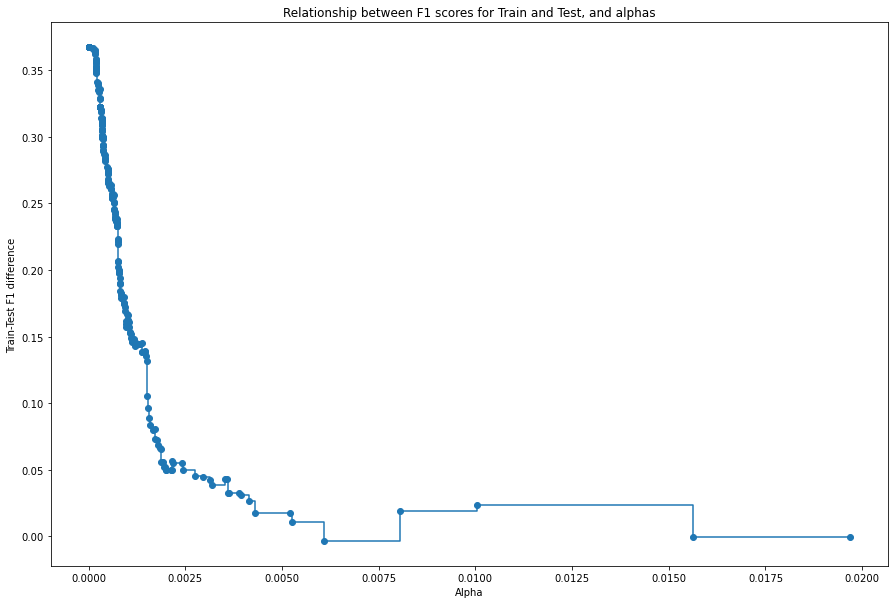

In [60]:
# calculate the difference between train F1 and test f1, element-wise
diff = np.subtract(f1_train, f1_test)

# plot a figure to visualize the relationship between the difference and alpha
plt.figure(figsize = (15,10))
plt.plot(ccp_alphas, diff, marker='o', label="diff",
        drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Train-Test F1 difference')
plt.title('Relationship between F1 scores for Train and Test, and alphas');

The goal is to maintain alpha as low as possible, while lower the difference as much as possible.
Notice the very steep decline in difference, without a significant increase in alpha, down to about 0.05 of a difference. After this, alpha starts to increase more rapidly.

CONCLUSION: choose the alpha corresponding to about 0.05 in difference.

In [67]:
# I have selected a difference, which was closest to 0.1, and used it as an index

# first, convert array into list, as the function .index cannot be used on arrays
list_diff = list(diff) 

index = list_diff.index(0.05559933593914168)
dt_post = models_ccp[index]

# get performance metrics
dec_tree_performance(dt_post, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.791299,0.768085
Recall,0.772071,0.685393
Precision,0.469268,0.429577
F1,0.583738,0.528139
Cohen's kappa,0.455320,0.384950


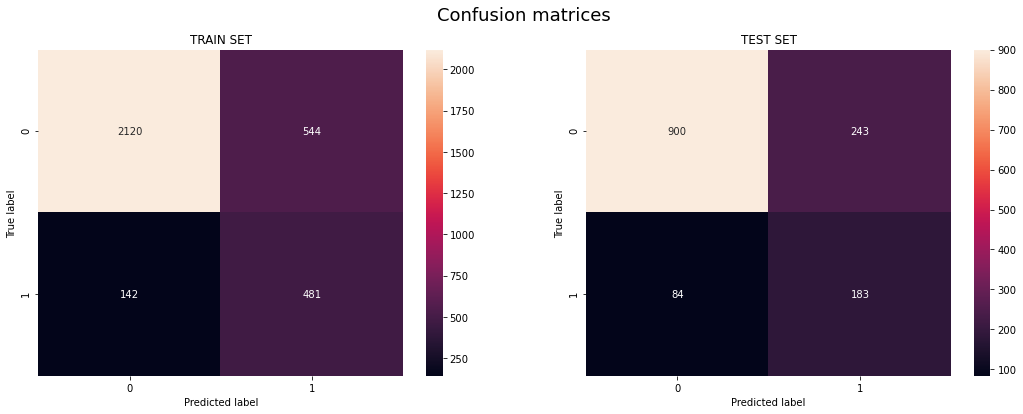

In [68]:
# create confusion matrices

dec_tree_confmat(dt_post, X_train, y_train, X_test, y_test)

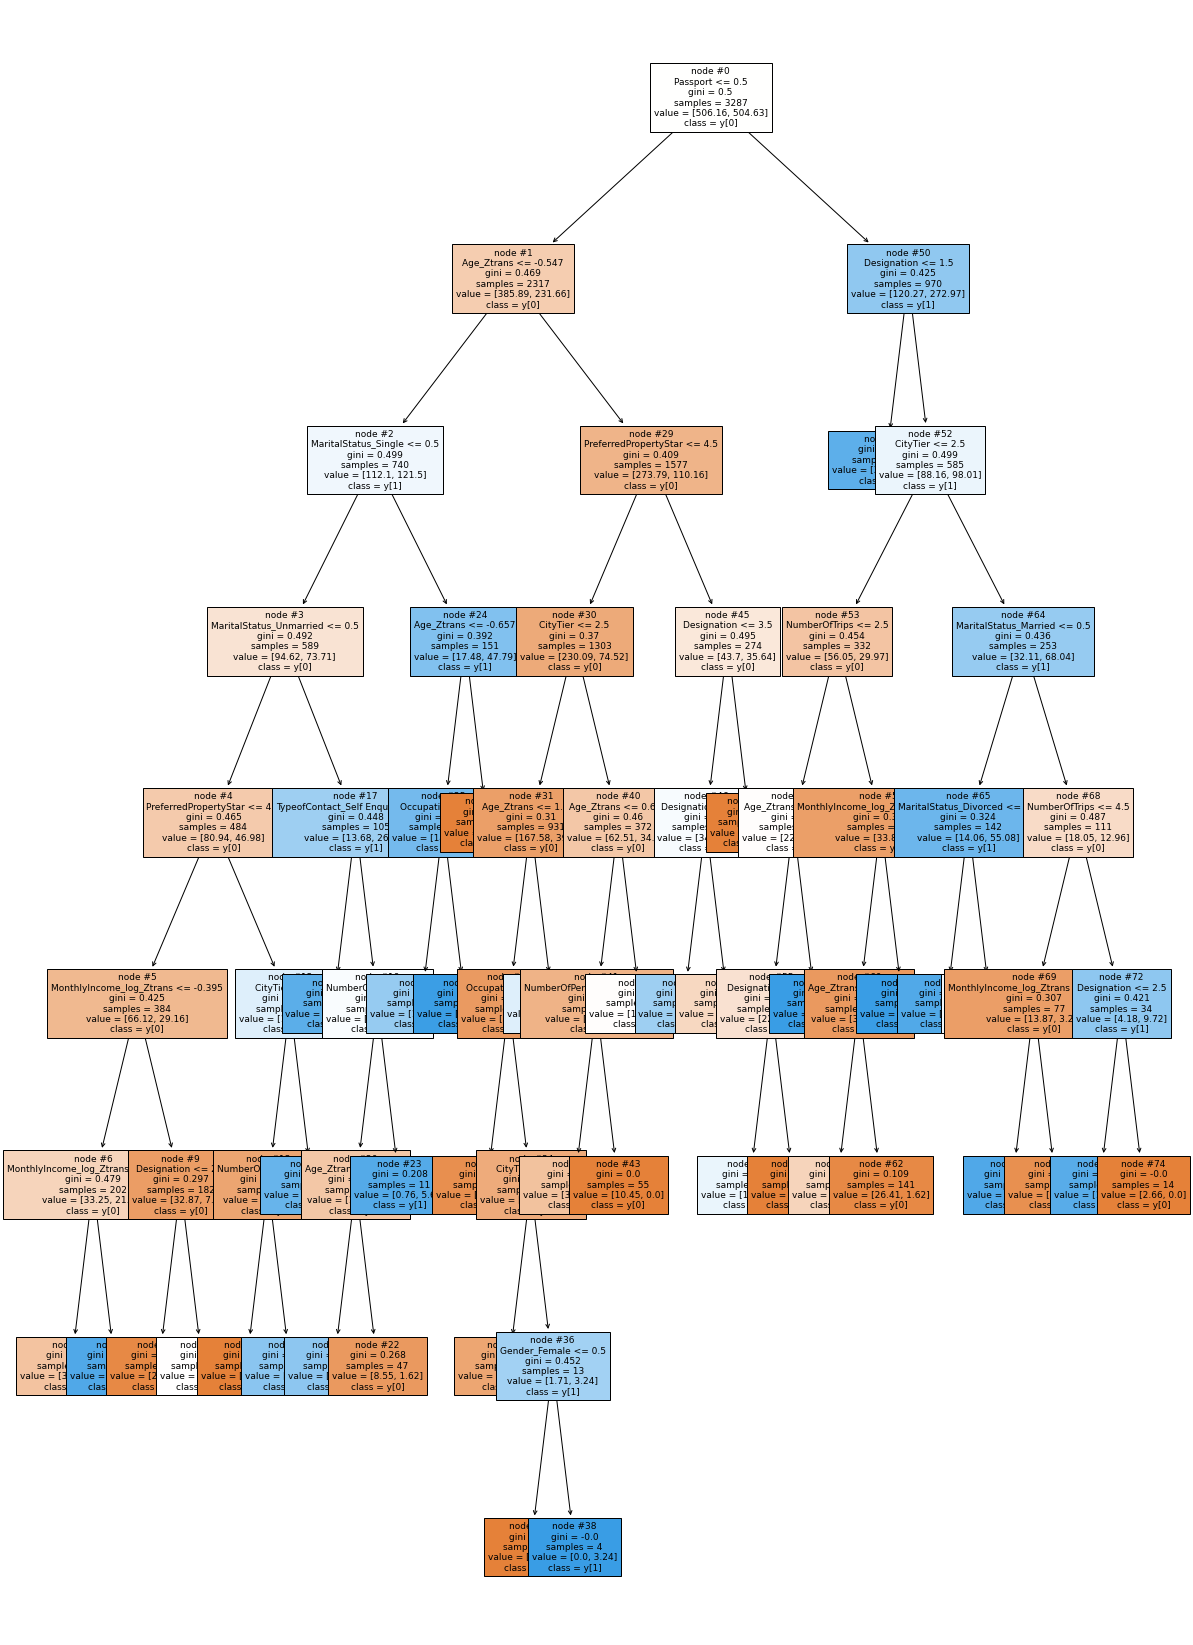

In [69]:
# visualise the complexity of this model

plt.figure(figsize=(20,30))
tree.plot_tree(dt_post, feature_names= list(X.columns), filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

This model sits somewhere in between the basic dt model and the bagging model in terms of complexity, performance and overfit.

In [70]:
# I will now compare all models so far

dtree_perf_summary = pd.concat([

    dec_tree_performance(dt_basic, X_train, y_train, X_test, y_test),
    dec_tree_performance(dt_pre, X_train, y_train, X_test, y_test),
    dec_tree_performance(dt_post, X_train, y_train, X_test, y_test),
], axis = 1) 

dtree_perf_summary.columns = [
    "DT - BASIC TRAIN",
    "DT - BASIC TEST",
    "DT - PRE TRAIN",
    "DT - PRE TEST",
    "DT - POST TRAIN",
    "DT - POST TEST"
]

dtree_perf_summary

,DT - BASIC TRAIN,DT - BASIC TEST,DT - PRE TRAIN,DT - PRE TEST,DT - POST TRAIN,DT - POST TEST
Accuracy,1.0,0.861702,0.761789,0.741844,0.791299,0.768085
Recall,1.0,0.629213,0.693419,0.644195,0.772071,0.685393
Precision,1.0,0.636364,0.421875,0.390023,0.469268,0.429577
F1,1.0,0.632768,0.524590,0.485876,0.583738,0.528139
Cohen's kappa,1.0,0.547582,0.377995,0.327151,0.455320,0.384950


OBSERVATIONS:

The post-pruned model is the best compromise in terms of accuracy, overfit and complexity. Its F1 score is 0.53 (on TEST data), which means that it's overall accuracy is about 53%, just slightly above chance level.
Further broken down, it can identify clients who would buy the product with an accuracy of about 68%, however it tends to also include many clients who will not buy, with a precision of about 43% (chance level).

The goal was to strike a balance between recall and precision. Unfortunately, besides the first model (which was too overfit), the other two model favoured recall over precision, with the post-pruned model having the best ration. Depending on advertising costs, this ratio may or may not be acceptable.

STEP 11 - BAGGING ensemble techniques

In [71]:
# fit a simple bagging classifier

bag_basic = BaggingClassifier(random_state=1)
bag_basic.fit(X_train, y_train)

dec_tree_performance(bag_basic, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.987527,0.874468
Recall,0.937400,0.486891
Precision,0.996587,0.764706
F1,0.966088,0.594966
Cohen's kappa,0.958454,0.524981


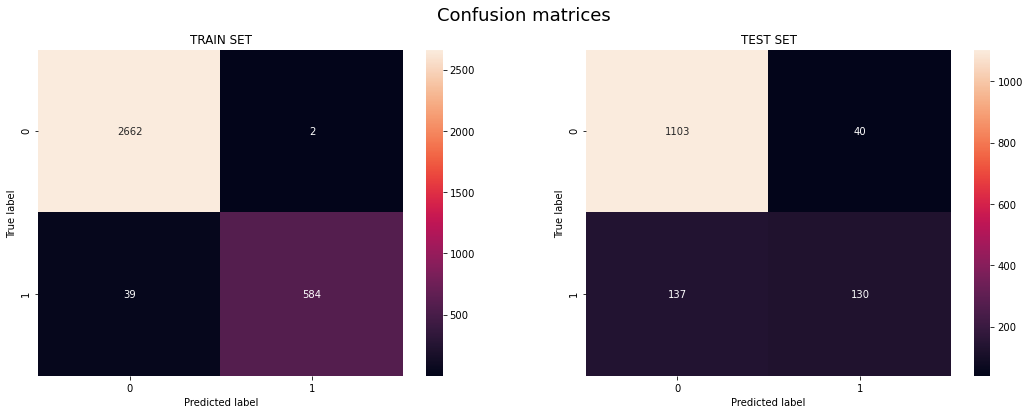

In [72]:
dec_tree_confmat(bag_basic, X_train, y_train, X_test, y_test)

Compare to the best Decision Tree model, this simple bagging classifier is still overfit, though less so, but seems to have better precision. 

In [73]:
# fit a simple random forest classifier 

rf_basic = RandomForestClassifier(random_state=1)
rf_basic.fit(X_train, y_train)

dec_tree_performance(rf_basic, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,1.0,0.878723
Recall,1.0,0.471910
Precision,1.0,0.807692
F1,1.0,0.595745
Cohen's kappa,1.0,0.530115


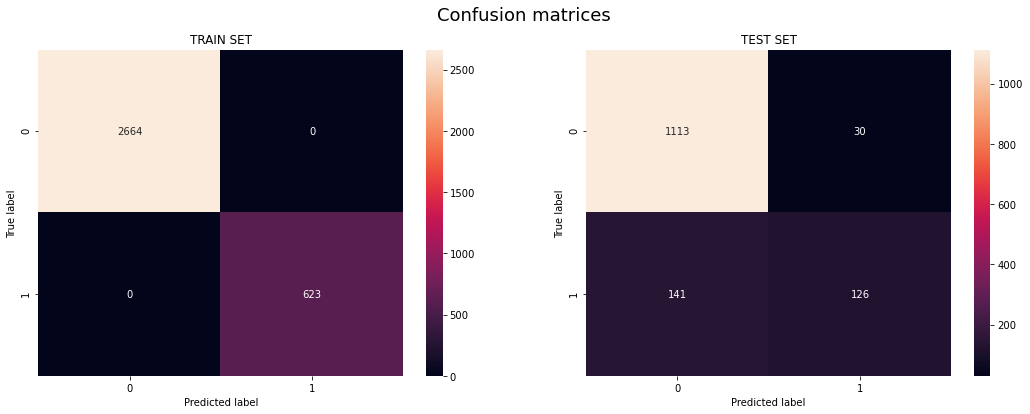

In [75]:
dec_tree_confmat(rf_basic, X_train, y_train, X_test, y_test)

Still overfit, but now noticeably less so. Precision is very high aand both composite measures are better here.

In [76]:
# improve performance of the BAGGING model using GridSearch

model = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }


acc_scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

bag_tuned = grid_obj.best_estimator_

bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [77]:
# get performance metrics
dec_tree_performance(bag_tuned, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.998783,0.890071
Recall,0.993579,0.535581
Precision,1.000000,0.821839
F1,0.996779,0.648526
Cohen's kappa,0.996029,0.586779


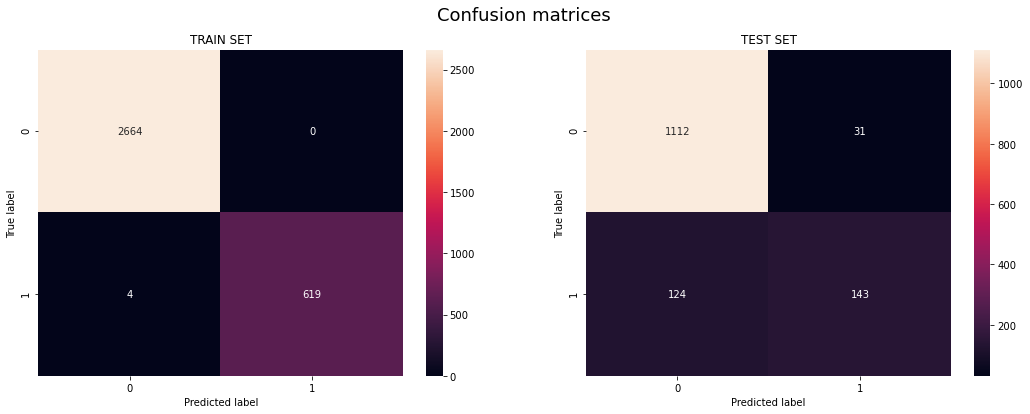

In [78]:
# create confusion matrices

dec_tree_confmat(bag_tuned, X_train, y_train, X_test, y_test)

The tuned bagging model appears to be more accurate than the basic one.

In [79]:
# improve performance of the Random Forest model using GridSearch

model = RandomForestClassifier(class_weight = {1:0.81, 0:0.19}, random_state=1)

parameters = {  
                'max_depth': list(np.arange(2, 10, 2)),
                'max_features': np.arange(0.6, 1, 0.2),
                'min_samples_split': np.arange(2, 20, 6),
                'n_estimators': np.arange(30, 150, 40),
                'min_impurity_decrease': [0.0001, 0.001, 0.01, 0.1]
} # I have selected a reduced number of option due to very long computation times, which may affect performance 

acc_scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

rf_tuned = grid_obj.best_estimator_

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=8,
                       max_features=0.8, min_impurity_decrease=0.001,
                       min_samples_split=14, n_estimators=30, random_state=1)

In [80]:
# get performance metrics
dec_tree_performance(rf_tuned, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.881351,0.842553
Recall,0.820225,0.644195
Precision,0.647655,0.575251
F1,0.723796,0.607774
Cohen's kappa,0.649569,0.509676


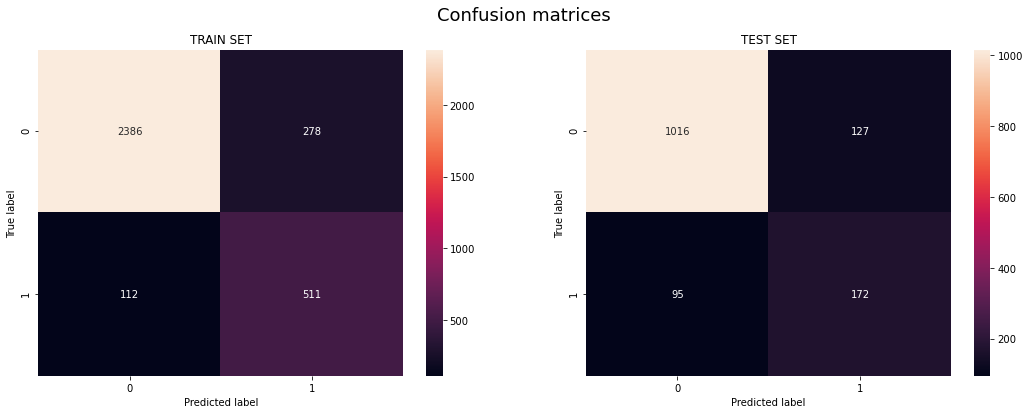

In [81]:
# create confusion matrices

dec_tree_confmat(rf_tuned, X_train, y_train, X_test, y_test)

This model does not appear to be better than its un-tuned version. This may be due to relatively low number of parameters chosen, which in turn was due to how long it took the computer to run it.

In [82]:
# I will now compare all models so far

bagging_perf_summary = pd.concat([

    dec_tree_performance(bag_basic, X_train, y_train, X_test, y_test),
    dec_tree_performance(bag_tuned, X_train, y_train, X_test, y_test),
    dec_tree_performance(rf_basic, X_train, y_train, X_test, y_test),
    dec_tree_performance(rf_tuned, X_train, y_train, X_test, y_test)
], axis = 1) 

bagging_perf_summary.columns = [
    "BAG - BASIC TRAIN",
    "BAG - BASIC TEST",
    "BAG - TUNED TRAIN",
    "BAG - TUNED TEST",
    "RF - BASIC TRAIN",
    "RF - BASIC TEST",
    "RF - TUNED TRAIN",
    "RF - TUNED TEST"
]

bagging_perf_summary

,BAG - BASIC TRAIN,BAG - BASIC TEST,BAG - TUNED TRAIN,BAG - TUNED TEST,RF - BASIC TRAIN,RF - BASIC TEST,RF - TUNED TRAIN,RF - TUNED TEST
Accuracy,0.987527,0.874468,0.998783,0.890071,1.0,0.878723,0.881351,0.842553
Recall,0.937400,0.486891,0.993579,0.535581,1.0,0.471910,0.820225,0.644195
Precision,0.996587,0.764706,1.000000,0.821839,1.0,0.807692,0.647655,0.575251
F1,0.966088,0.594966,0.996779,0.648526,1.0,0.595745,0.723796,0.607774
Cohen's kappa,0.958454,0.524981,0.996029,0.586779,1.0,0.530115,0.649569,0.509676


OBSERVATIONS:

The model with the best performance on the TEST set was the TUNED BAGGING CLASSIFIER, however this model is too overfit. The model with the least overfit was the TUNER RANDOM FOREST CLASSIFIER. Its overall accuracy (F1 score) was about 61%. Further broken down, the model was able to correctly identify clients who would buy at a rate of 64% and clients who would not buy with 58% accuracy.

This TUNED RF model represents a noticeable, but not major, improvement in both F1 and precision scores (at a small loss of recall) from the best decision tree model.

STEP 12 - BOOSTING ensemble techniques

In [83]:
# fit a simple ADA BOOST model

ada_basic =AdaBoostClassifier(random_state=1)
ada_basic.fit(X_train, y_train)

dec_tree_performance(ada_basic, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.845148,0.841135
Recall,0.306581,0.277154
Precision,0.712687,0.704762
F1,0.428732,0.397849
Cohen's kappa,0.355214,0.325776


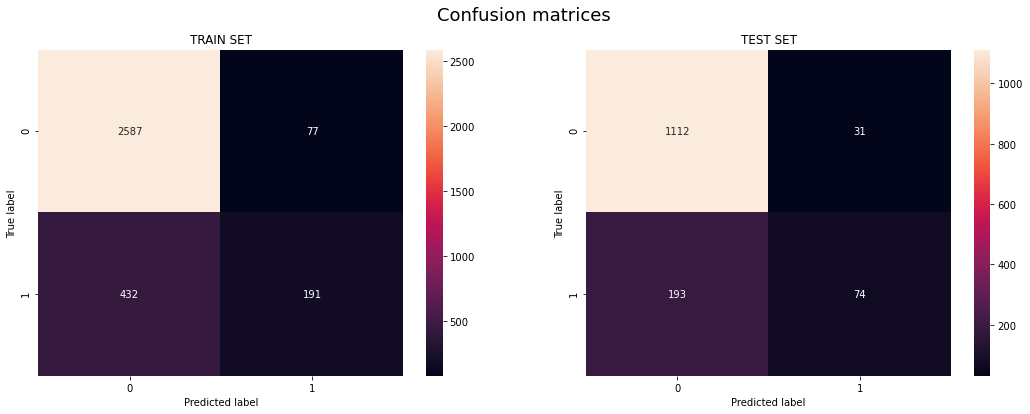

In [84]:
# get confusion matrices

dec_tree_confmat(ada_basic, X_train, y_train, X_test, y_test)

This model has low accuraccy, however there seems to be minimal overfit.

In [85]:
# improve performance using GridSearch

ada_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(ada_tuned, parameters, scoring = scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

ada_tuned = grid_obj.best_estimator_

ada_tuned.fit(X_train, y_train)

dec_tree_performance(ada_tuned, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.848798,0.839007
Recall,0.317817,0.280899
Precision,0.733333,0.681818
F1,0.443449,0.397878
Cohen's kappa,0.371404,0.323076


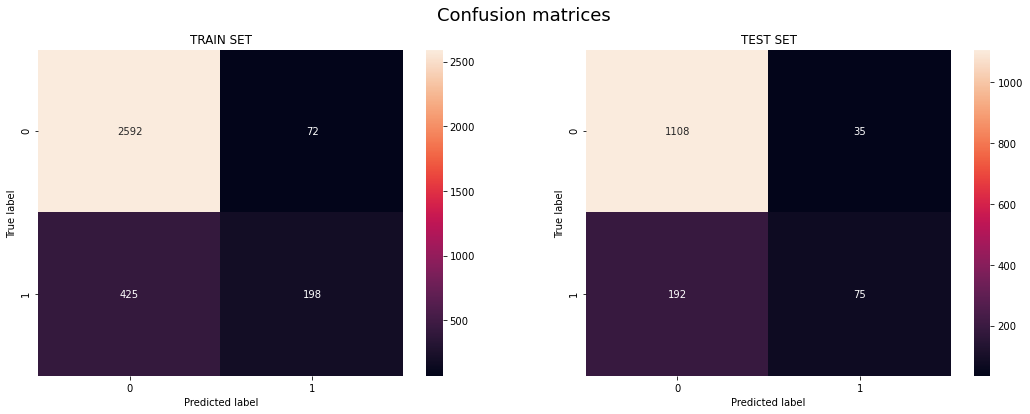

In [86]:
# get confusion matrices

dec_tree_confmat(ada_tuned, X_train, y_train, X_test, y_test)

Interestingly, tuning the adaboost model madeonly very slightly increased performance on the training set, but yielded identical results on the test set.

In [87]:
# fit a simple GRADIENT BOOST model

gbm_basic =GradientBoostingClassifier(random_state=1)
gbm_basic.fit(X_train, y_train)

dec_tree_performance(gbm_basic, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,0.888652,0.861702
Recall,0.478331,0.400749
Precision,0.879056,0.753521
F1,0.619543,0.523227
Cohen's kappa,0.560885,0.451046


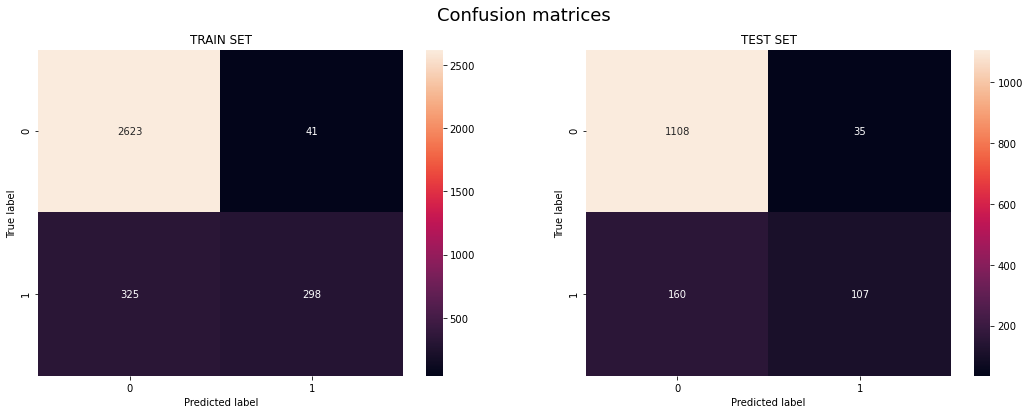

In [88]:
# get confusion matrices

dec_tree_confmat(gbm_basic, X_train, y_train, X_test, y_test)

The GBM is better than the tuned AdaBoost, but nonetheless not very accurate.

In [89]:
# improve performance of the GBM using GridSearch

gbm_tuned = GradientBoostingClassifier(random_state=1)

parameters = {'n_estimators': np.arange(50, 200, 50), 
              'subsample':[0.7, 0.85, 1],
              'max_features':[0.7, 0.85, 1],
              'max_depth':[3,5,7,10]
              }

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(gbm_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

gbm_tuned = grid_obj.best_estimator_
 
gbm_tuned.fit(X_train, y_train)

dec_tree_performance(gbm_tuned, X_train, y_train, X_test, y_test)

,TRAIN set,TEST set
Accuracy,1.0,0.914894
Recall,1.0,0.666667
Precision,1.0,0.851675
F1,1.0,0.747899
Cohen's kappa,1.0,0.697616


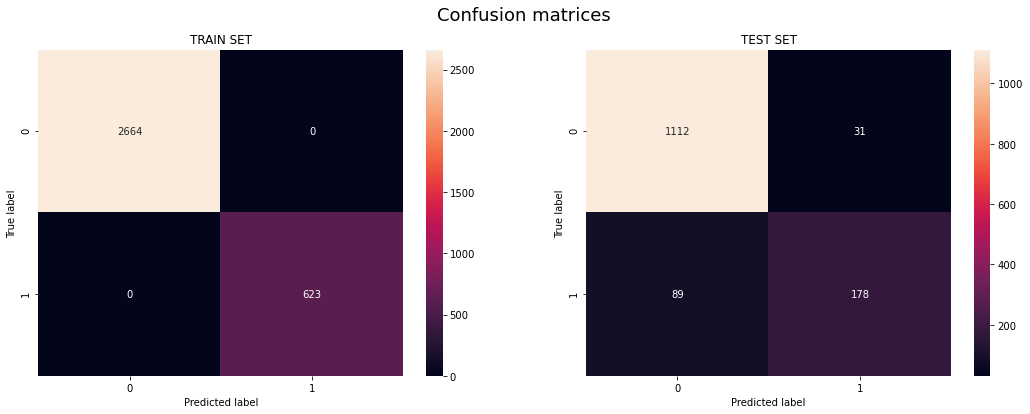

In [90]:
dec_tree_confmat(gbm_tuned, X_train, y_train, X_test, y_test)

This model represents a major improvement from the previous ones. The accuracy is much better, but the overfit is noticeable.

In [91]:
# important for XGBoost to work is making sure that there are no duplicated columns
X_train_XGB = X_train.copy()
X_test_XGB = X_test.copy()

X_train_XGB = X_train_XGB.loc[:,~X_train_XGB.columns.duplicated()]
X_test_XGB = X_test_XGB.loc[:,~X_test_XGB.columns.duplicated()]


In [92]:
# fit a simple XGBoost model

xgb_basic =XGBClassifier(eval_metric='logloss', random_state=1)
xgb_basic.fit(X_train_XGB,y_train)

dec_tree_performance(xgb_basic, X_train_XGB, y_train, X_test_XGB, y_test)

,TRAIN set,TEST set
Accuracy,0.996958,0.904255
Recall,0.983949,0.640449
Precision,1.000000,0.814286
F1,0.991909,0.716981
Cohen's kappa,0.990036,0.660350


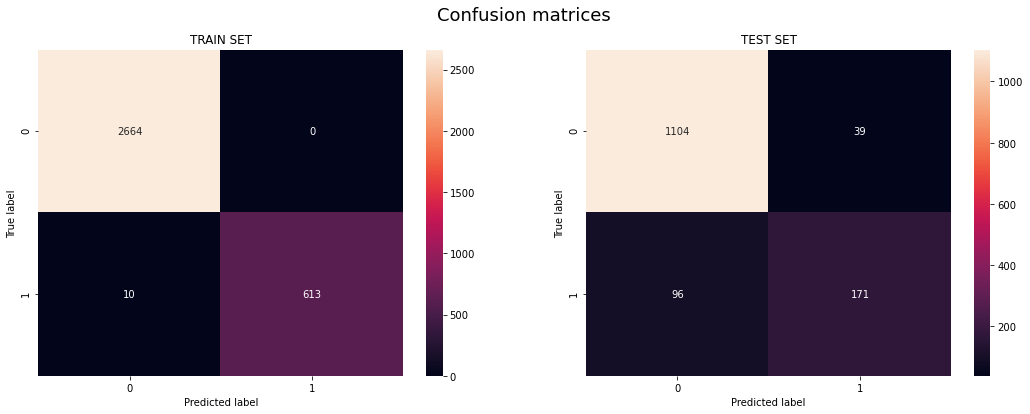

In [93]:
# get confusion matrices 

dec_tree_confmat(xgb_basic, X_train_XGB, y_train, X_test_XGB, y_test)

Good basic model. Relatively high accuracy, but noticeable overfit especially in the case of recall.

In [94]:
# improve XGBoost model using GridSearch

xgb_tuned = XGBClassifier(eval_metric='logloss', random_state=1)

parameters = {'n_estimators': [80, 115, 150], 
              'subsample':[0.7, 0.85, 1],
              'gamma':[0, 2, 5],
              'colsample_bytree':[0.7, 0.85, 1],
              'colsample_bylevel':[0.7, 0.85, 1]
              }

scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_XGB, y_train)

xgb_tuned = grid_obj.best_estimator_
 
xgb_tuned.fit(X_train_XGB, y_train)

dec_tree_performance(xgb_tuned, X_train_XGB, y_train, X_test_XGB, y_test)

,TRAIN set,TEST set
Accuracy,0.999392,0.909220
Recall,0.996790,0.659176
Precision,1.000000,0.826291
F1,0.998392,0.733333
Cohen's kappa,0.998017,0.679465


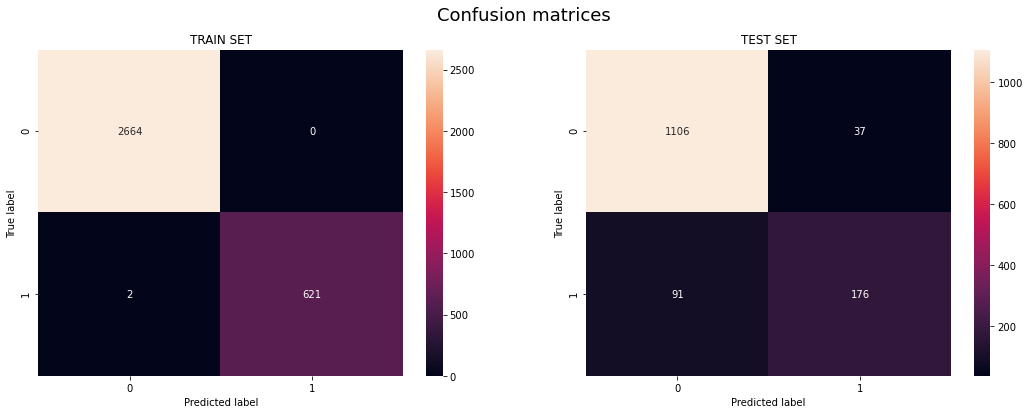

In [95]:
# get confusion matrices 

dec_tree_confmat(xgb_tuned, X_train_XGB, y_train, X_test_XGB, y_test)

In [96]:
# I will now compare all models so far

boosting_perf_summary = pd.concat([

    dec_tree_performance(ada_basic, X_train, y_train, X_test, y_test).iloc[:,1],
    dec_tree_performance(ada_tuned, X_train, y_train, X_test, y_test).iloc[:,1],
    dec_tree_performance(gbm_basic, X_train, y_train, X_test, y_test).iloc[:,1],
    dec_tree_performance(gbm_tuned, X_train, y_train, X_test, y_test).iloc[:,1],
    dec_tree_performance(xgb_basic, X_train_XGB, y_train, X_test_XGB, y_test).iloc[:,1],
    dec_tree_performance(xgb_tuned, X_train_XGB, y_train, X_test_XGB, y_test).iloc[:,1]
], axis = 1) 

boosting_perf_summary.columns = [
    "AdaBoost - BASIC TEST",
    "AdaBoost - TUNED TEST",
    "GBM - BASIC TEST",
    "GBM - TUNED TEST",
    "XGB - BASIC TEST",
    "XGB - TUNED TEST"
]

boosting_perf_summary

,AdaBoost - BASIC TEST,AdaBoost - TUNED TEST,GBM - BASIC TEST,GBM - TUNED TEST,XGB - BASIC TEST,XGB - TUNED TEST
Accuracy,0.841135,0.839007,0.861702,0.914894,0.904255,0.909220
Recall,0.277154,0.280899,0.400749,0.666667,0.640449,0.659176
Precision,0.704762,0.681818,0.753521,0.851675,0.814286,0.826291
F1,0.397849,0.397878,0.523227,0.747899,0.716981,0.733333
Cohen's kappa,0.325776,0.323076,0.451046,0.697616,0.660350,0.679465


OBSERVATIONS:

The model with the best performance on the TEST set is the TUNED GradientBoost model. Its overall accuracy is 75%, whilst its recall is about 67% and precision 85%. It does show an overfit.

STEP 13 - BEST MODEL SELECTION

In [97]:
# create a dataframe with the best models from each technique 

overall_perf_summary = pd.concat([

    dec_tree_performance(dt_post, X_train, y_train, X_test, y_test),
    dec_tree_performance(rf_tuned, X_train, y_train, X_test, y_test),
    dec_tree_performance(gbm_tuned, X_train, y_train, X_test, y_test)   
], axis = 1) 

overall_perf_summary.columns = [
    "DEC. TREE - POST TRAIN",
    "DEC. TREE - POST TEST",
    "RANDOM F. - TUNED TRAIN",
    "RANDOM F. - TUNED TEST",
    "GBM - TUNED TRAIN",
    "GBM - TUNED TEST"
]

overall_perf_summary

,DEC. TREE - POST TRAIN,DEC. TREE - POST TEST,RANDOM F. - TUNED TRAIN,RANDOM F. - TUNED TEST,GBM - TUNED TRAIN,GBM - TUNED TEST
Accuracy,0.791299,0.768085,0.881351,0.842553,1.0,0.914894
Recall,0.772071,0.685393,0.820225,0.644195,1.0,0.666667
Precision,0.469268,0.429577,0.647655,0.575251,1.0,0.851675
F1,0.583738,0.528139,0.723796,0.607774,1.0,0.747899
Cohen's kappa,0.455320,0.384950,0.649569,0.509676,1.0,0.697616


The non-esemble model, the post-pruned decision tree, is noticeably worse than the other two in terms of accuracy, though it shows only minor overfit.

From the two ensemmble models, the TUNED GradientBoost model is more accurate than the TUNED RandomForest model, but show more overfit.

CONCLUSION:
The TUNED RANDOM FOREST model is the best compromise.

STEP 14 - COEFFICIENT ANALYSIS



In [100]:
# as the tuned GBM model was deemed to be the best, I will only perform a coefficient analysis on it

print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Passport                       0.167471
Age_Ztrans                     0.152674
Designation                    0.151463
MonthlyIncome_log_Ztrans       0.138670
NumberOfTrips                  0.065626
PreferredPropertyStar          0.059750
CityTier                       0.056980
MaritalStatus_Married          0.030226
Occupation                     0.029968
MaritalStatus_Unmarried        0.024361
MaritalStatus_Single           0.020567
MaritalStatus_Divorced         0.018272
NumberOfChildrenVisiting       0.015873
OwnCar                         0.014166
NumberOfPersonVisiting         0.012753
Gender_Female                  0.011366
Gender_Male                    0.010355
TypeofContact_Self Enquiry     0.010025
TypeofContact_Company Invited  0.009434


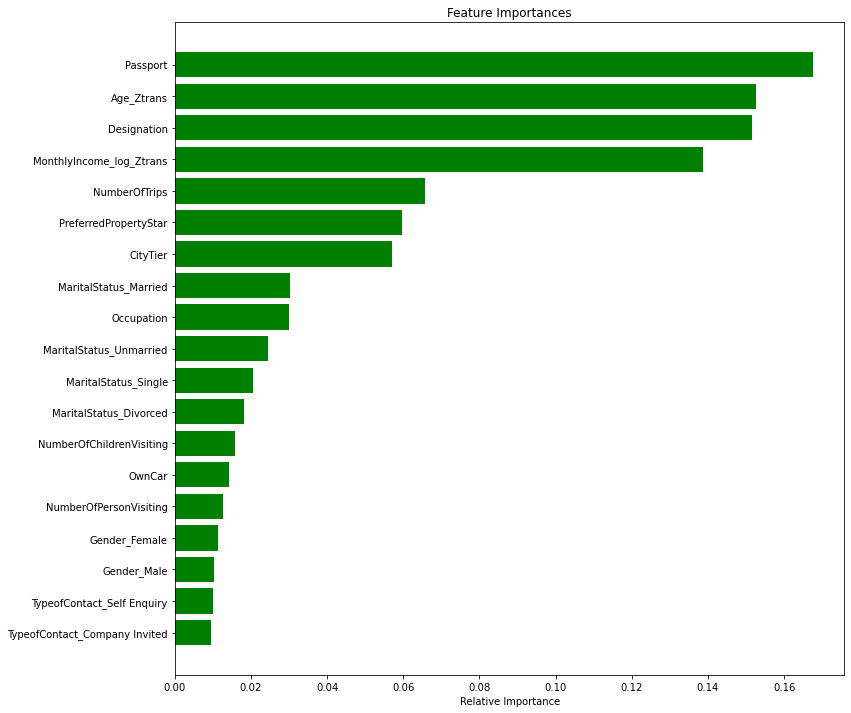

In [101]:
# extract the feature importances from the best model
importances = rf_tuned.feature_importances_

# sorts the importances
indices = np.argsort(importances)

# create figure
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

OBSERVATIONS:

1. MAJOR influences: Passport, Age, Designation and Monthly Income.
2. MINOR influences: Number of trips, Property star and City tier. 

INSIGHTS AND RECOMMENDATIONS:

1. A tuned Random Forest model was fitted to the data, it has an overall accuracy of 60%. It is able to correctly identify 64% of the clients who would buy a product. It has a precision of 58%.. This model ensures that, while most receptive clients will be approached, not too many resources will be spent on pointless advertising.

2. This model has identified four main factors contributing to the decision making: Passport, Age, Designation and Monthly Income.
3. There are a further four minor factors: Number of trips, Property star and City tier. 

4. Advertising should target younger, less wealthy clients, who are at an executive level.
6. Target clients with a passport and those wanting higher Property stars and several trips (the more, the better).